In [1]:
pip install matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
import pickle

def load_gen_info(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

# Example: Load the data
data = load_gen_info('dead_agents_infofirst_success.pkl')


In [4]:
# Check the overall structure
print(data.keys())  # Should include generation numbers

# Example: Check a specific generation's data
generation = 1  # Replace with a valid generation number
if generation in data:
    print(data[generation].keys())  # Should include 'agents' and 'genomes'
    print(len(data[generation]['agents']))  # Number of agents in this generation
    print(len(data[generation]['genomes']))  # Number of genomes


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])
dict_keys(['agents', 'genomes'])
75
75


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_agent_properties(data, generation):
    agents = data[generation]["agents"]
    ages = [agent["age"] for agent in agents]
    energy_levels = [agent["energy_level"] for agent in agents]
    body_sizes = [agent["body_size"] for agent in agents]

    print(f"Generation {generation}:")
    print(f"  Average Age: {np.mean(ages):.2f}")
    print(f"  Average Energy Level: {np.mean(energy_levels):.2f}")
    print(f"  Average Body Size: {np.mean(body_sizes):.2f}")

    # Plot distributions
    plt.figure(figsize=(10, 6))
    plt.hist(ages, bins=10, alpha=0.5, label='Age')
    plt.hist(energy_levels, bins=10, alpha=0.5, label='Energy Level')
    plt.hist(body_sizes, bins=10, alpha=0.5, label='Body Size')
    plt.legend()
    plt.title(f"Distributions for Generation {generation}")
    plt.show()

# Example usage


Generation 0:
  Average Age: 1744.00
  Average Energy Level: 94.90
  Average Body Size: 6.00


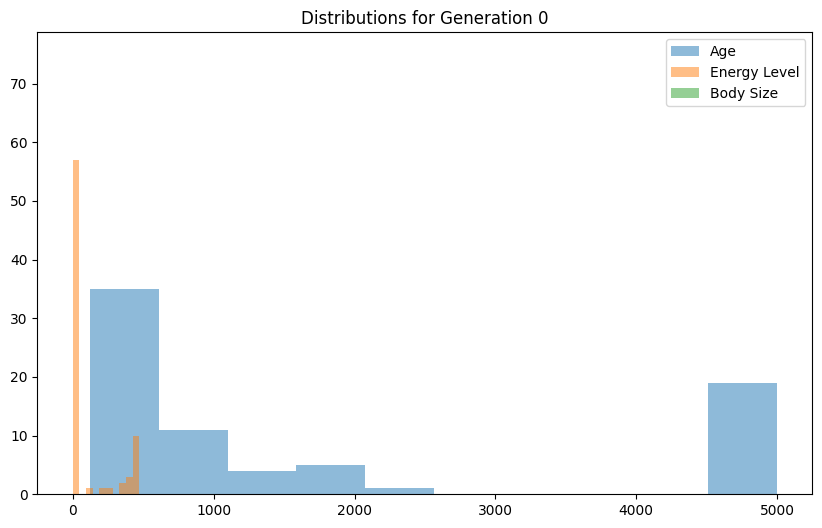

Generation 1:
  Average Age: 1770.04
  Average Energy Level: 94.89
  Average Body Size: 6.00


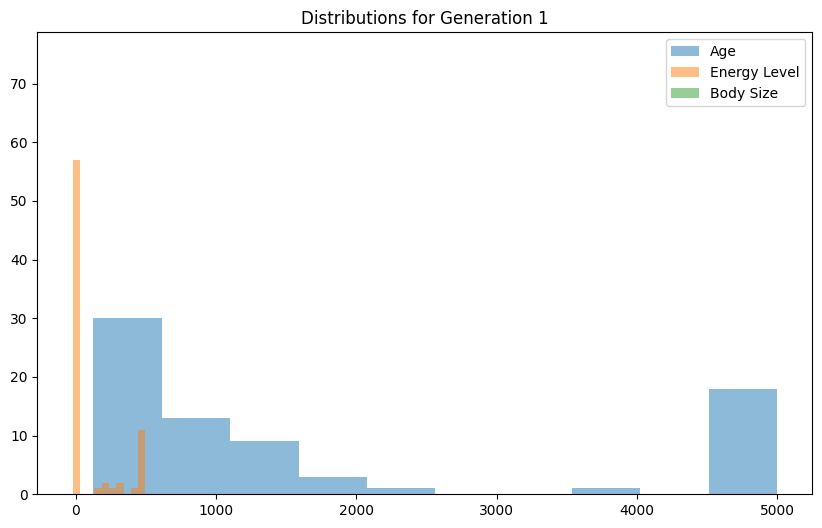

Generation 2:
  Average Age: 1736.65
  Average Energy Level: 76.93
  Average Body Size: 6.00


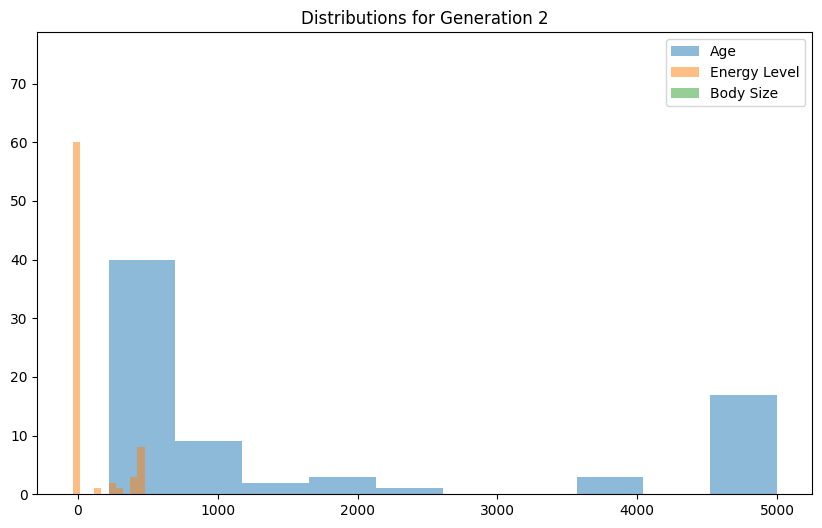

Generation 3:
  Average Age: 1291.73
  Average Energy Level: 39.34
  Average Body Size: 6.00


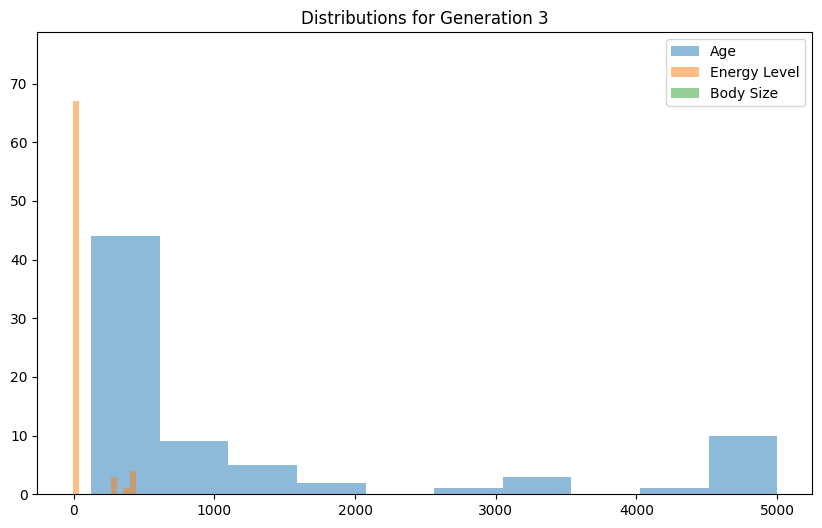

Generation 4:
  Average Age: 1141.83
  Average Energy Level: 47.50
  Average Body Size: 6.00


Generation 5:
  Average Age: 905.47
  Average Energy Level: 30.46
  Average Body Size: 6.00


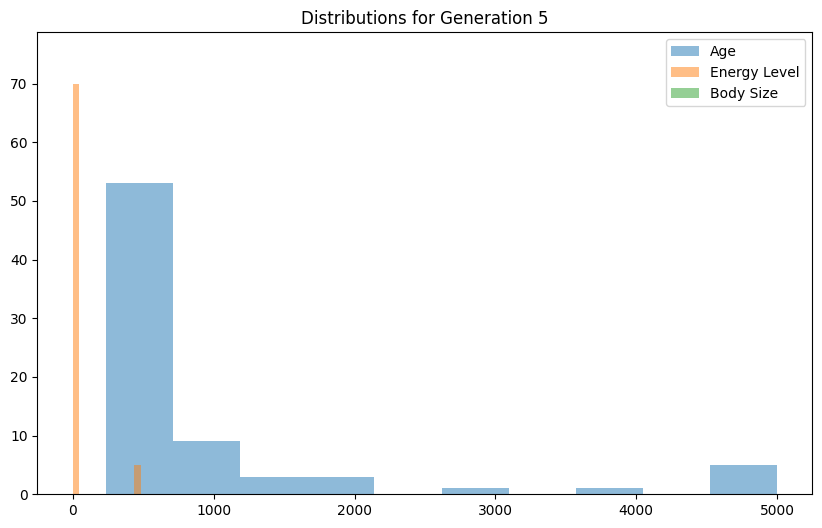

Generation 6:
  Average Age: 1716.93
  Average Energy Level: 66.24
  Average Body Size: 6.00


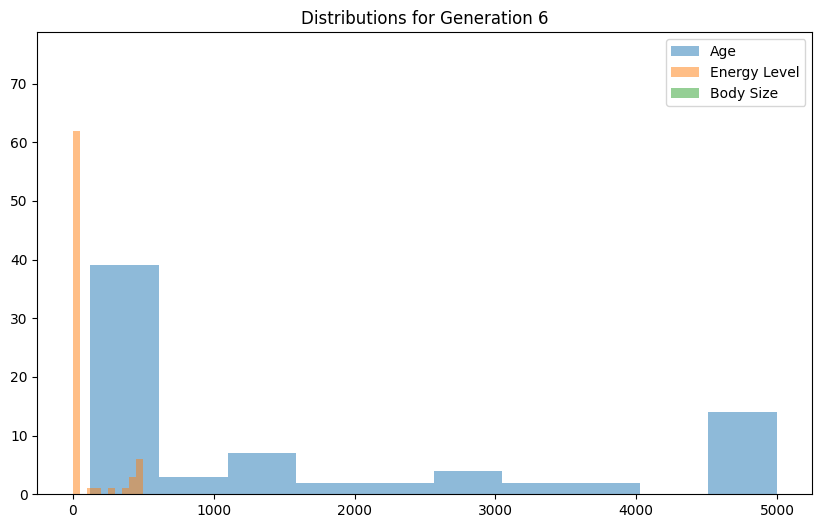

Generation 7:
  Average Age: 1423.68
  Average Energy Level: 62.70
  Average Body Size: 6.00


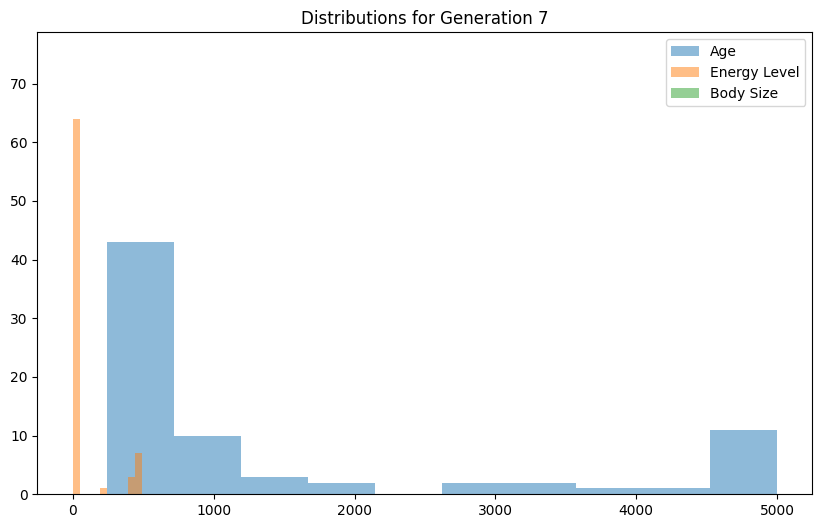

Generation 8:
  Average Age: 1155.79
  Average Energy Level: 35.46
  Average Body Size: 6.00


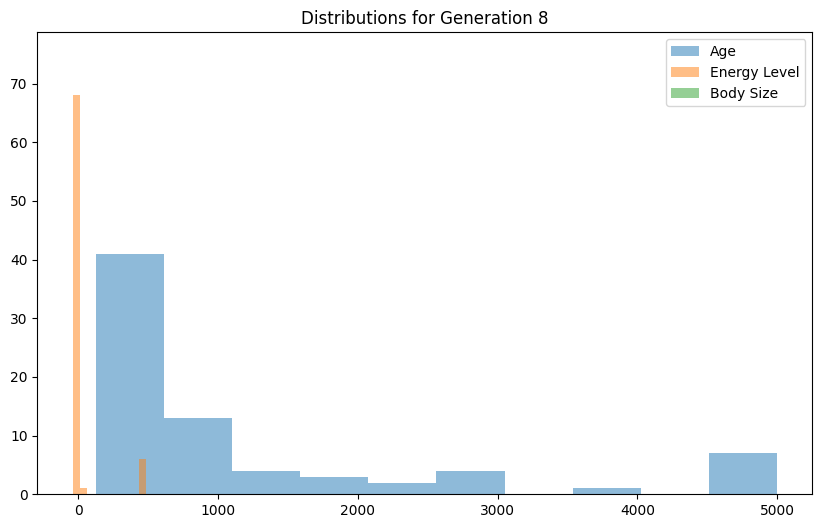

Generation 9:
  Average Age: 1248.47
  Average Energy Level: 42.14
  Average Body Size: 6.00


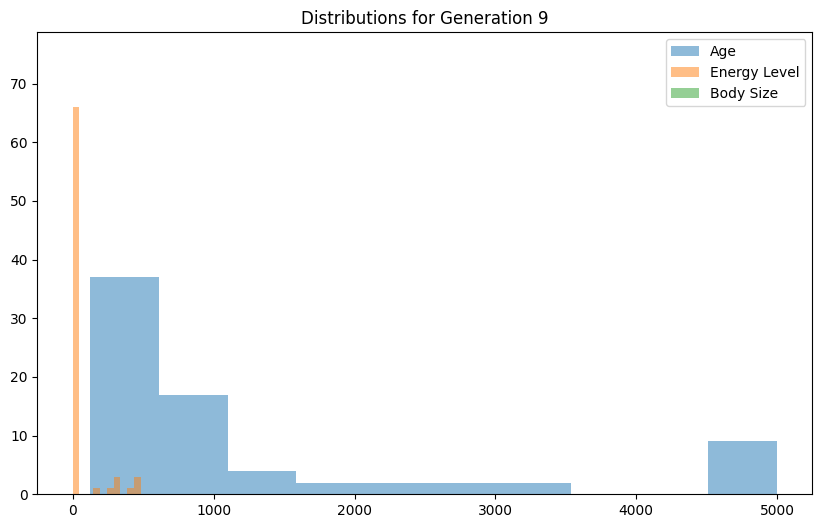

Generation 10:
  Average Age: 1496.31
  Average Energy Level: 59.53
  Average Body Size: 6.00


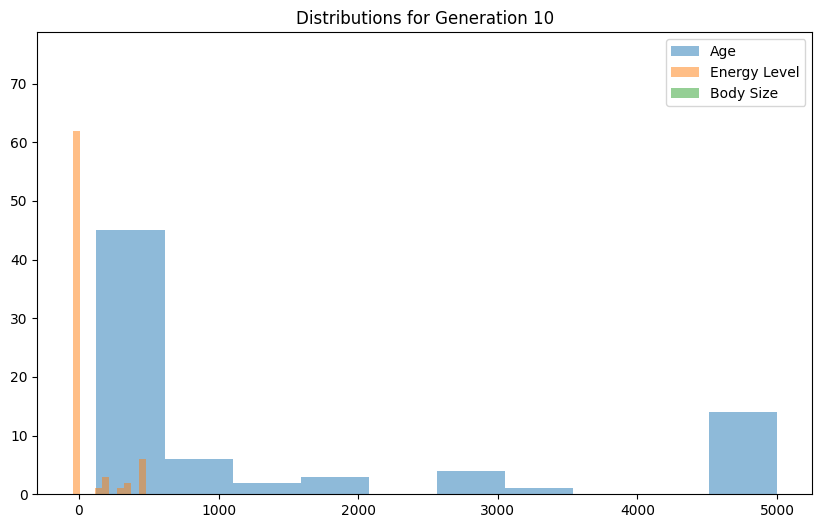

Generation 11:
  Average Age: 1231.13
  Average Energy Level: 42.63
  Average Body Size: 6.00


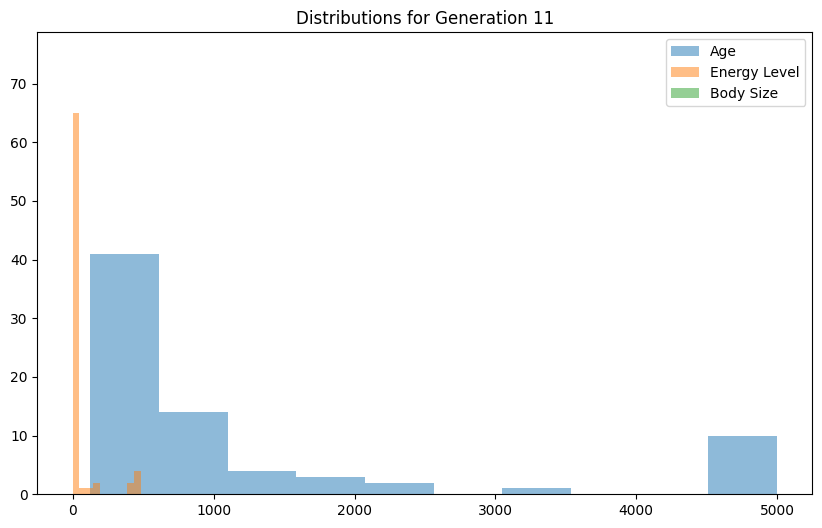

Generation 12:
  Average Age: 1621.80
  Average Energy Level: 54.65
  Average Body Size: 6.00


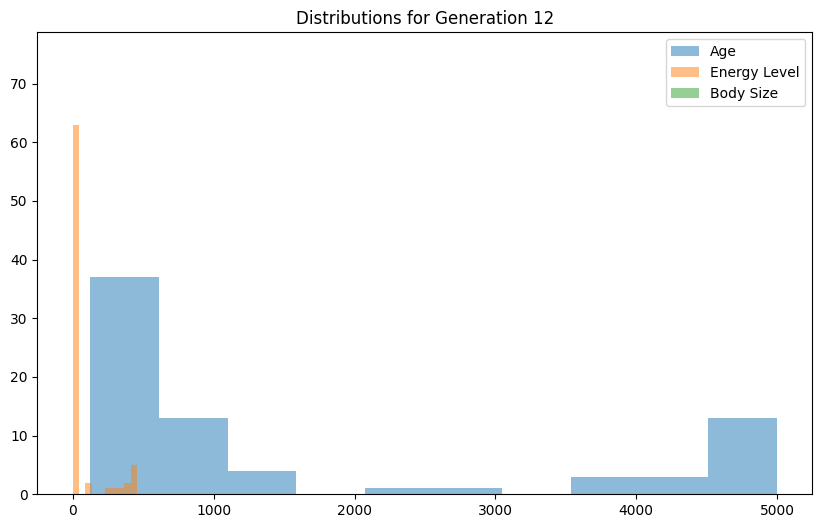

Generation 13:
  Average Age: 1867.73
  Average Energy Level: 74.25
  Average Body Size: 6.00


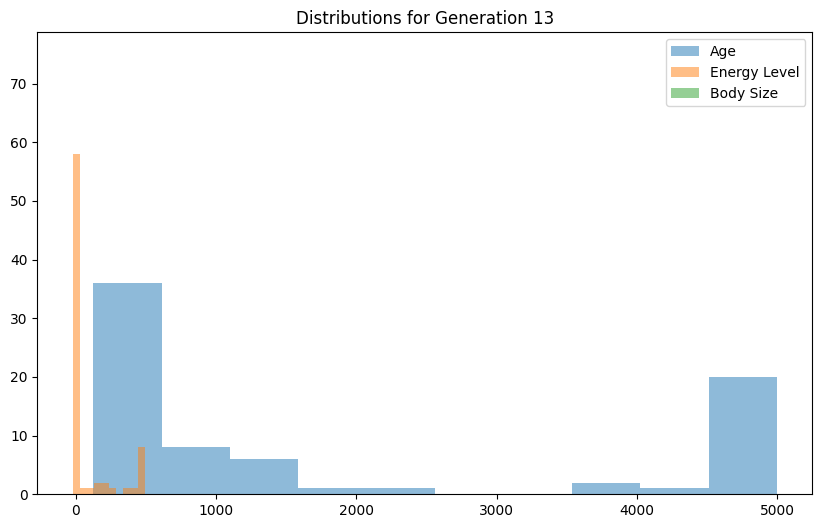

Generation 14:
  Average Age: 1564.80
  Average Energy Level: 43.43
  Average Body Size: 6.00


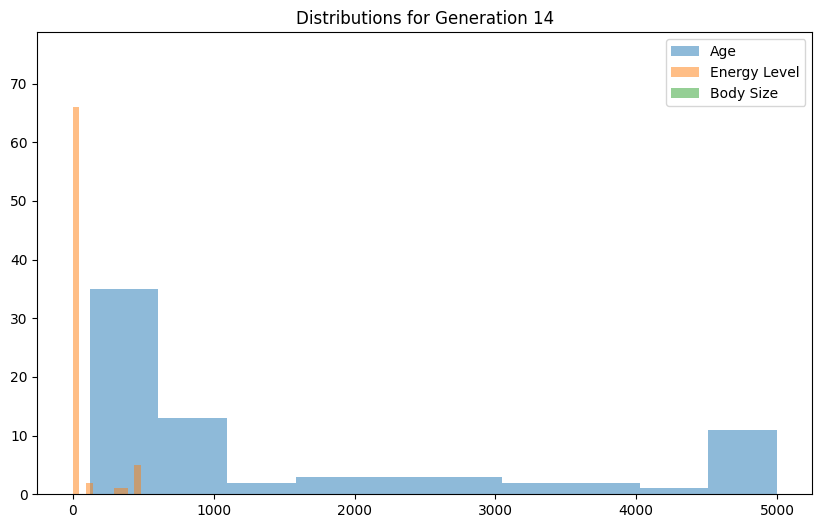

Generation 15:
  Average Age: 1138.84
  Average Energy Level: 21.04
  Average Body Size: 6.00


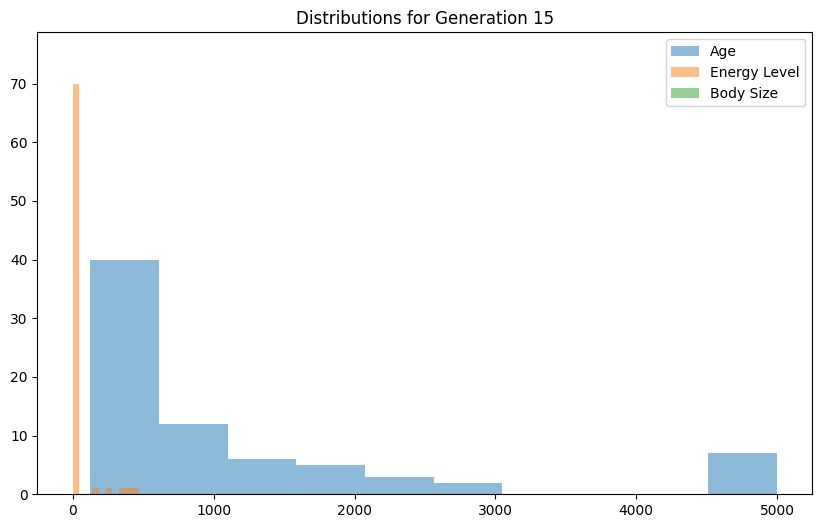

Generation 16:
  Average Age: 1636.75
  Average Energy Level: 70.37
  Average Body Size: 6.00


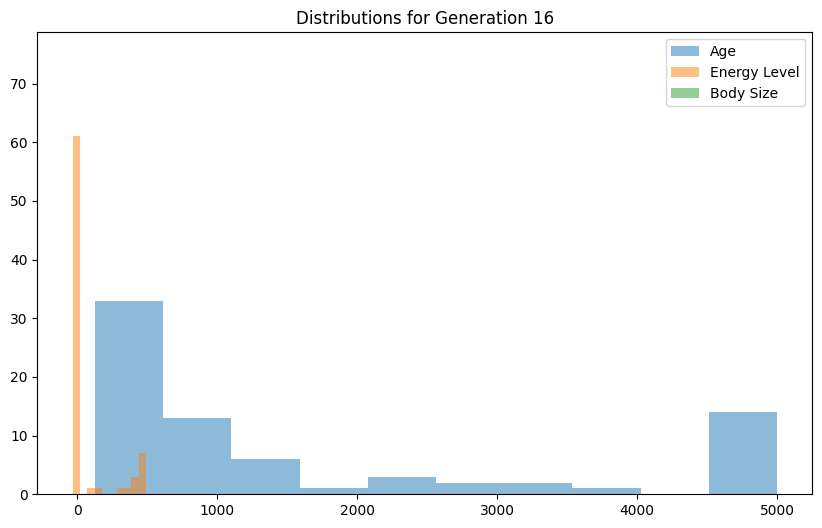

Generation 17:
  Average Age: 1773.33
  Average Energy Level: 55.32
  Average Body Size: 6.00


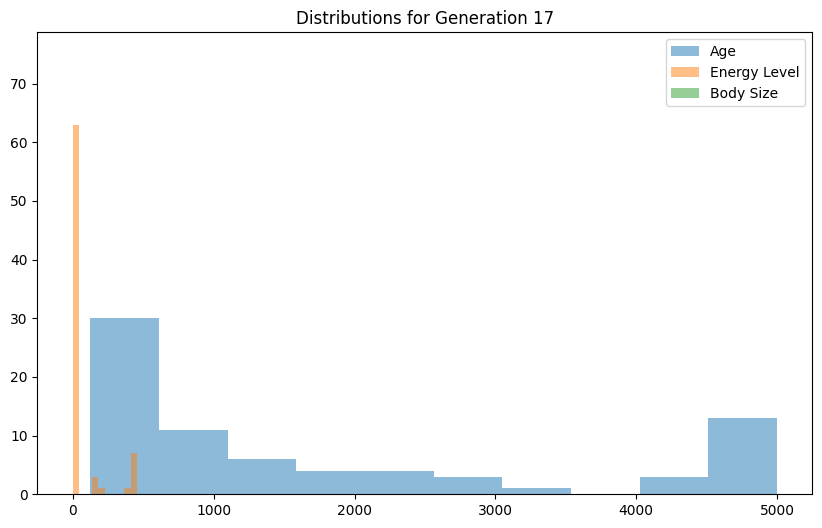

Generation 18:
  Average Age: 1479.91
  Average Energy Level: 50.83
  Average Body Size: 6.00


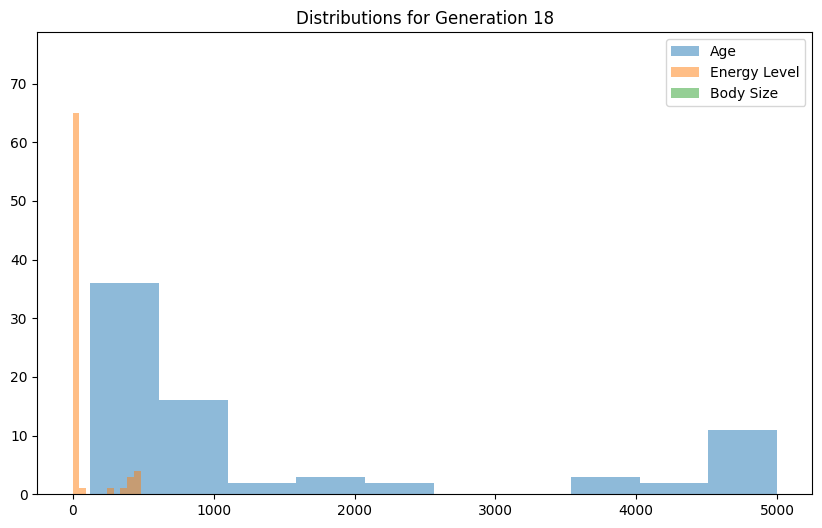

Generation 19:
  Average Age: 1895.32
  Average Energy Level: 92.47
  Average Body Size: 6.00


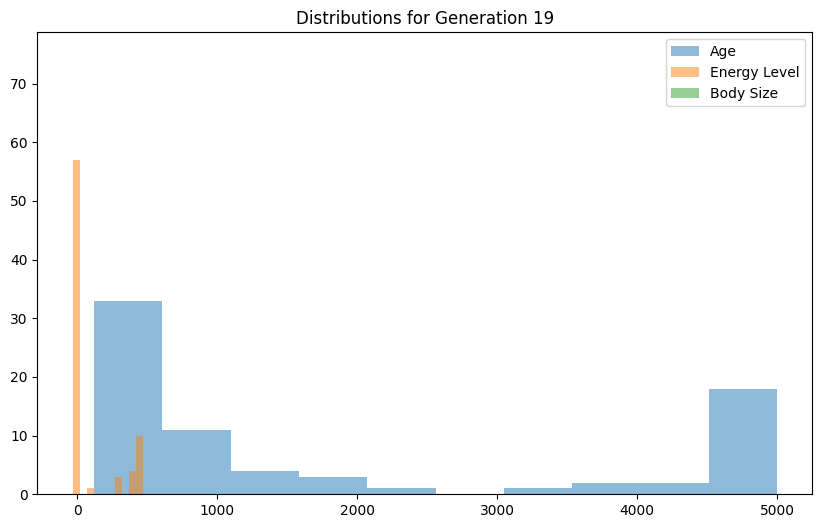

Generation 20:
  Average Age: 1642.99
  Average Energy Level: 73.84
  Average Body Size: 6.00


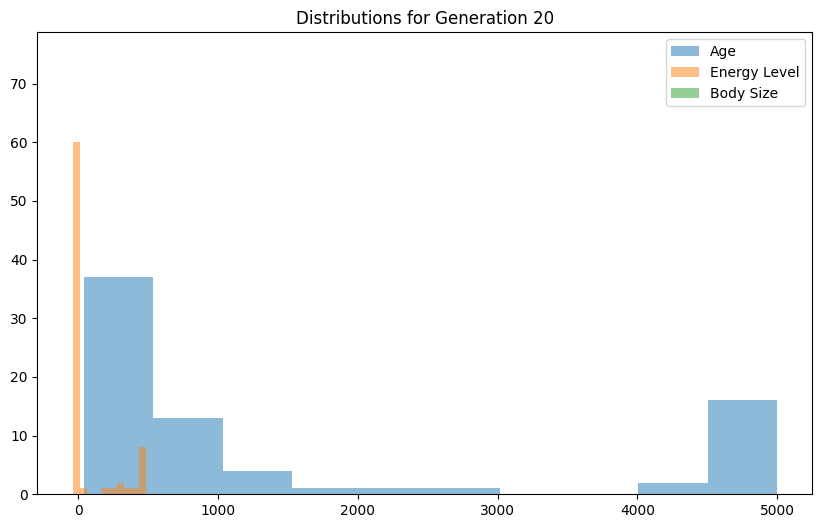

Generation 21:
  Average Age: 1341.67
  Average Energy Level: 59.32
  Average Body Size: 6.00


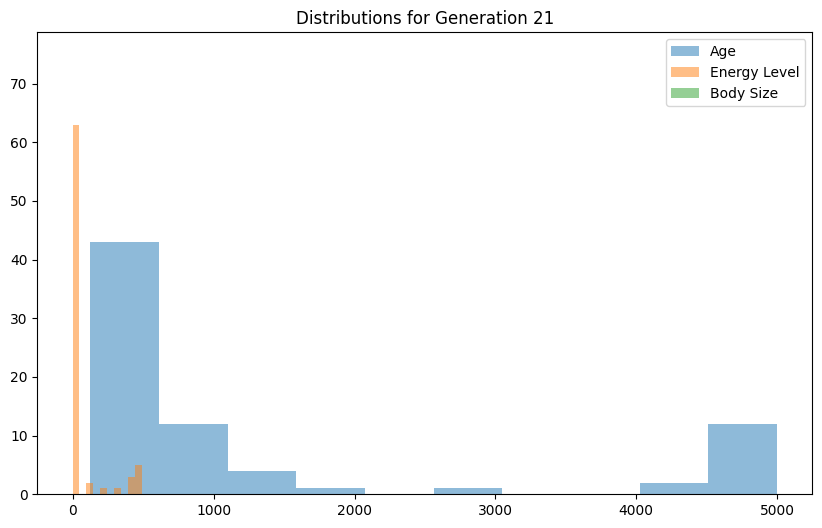

Generation 22:
  Average Age: 1435.47
  Average Energy Level: 73.15
  Average Body Size: 6.00


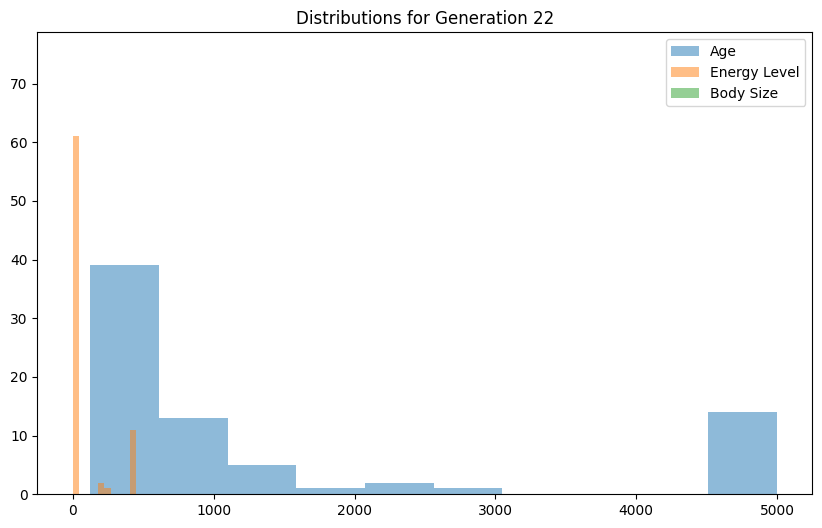

Generation 23:
  Average Age: 1039.89
  Average Energy Level: 43.78
  Average Body Size: 6.00


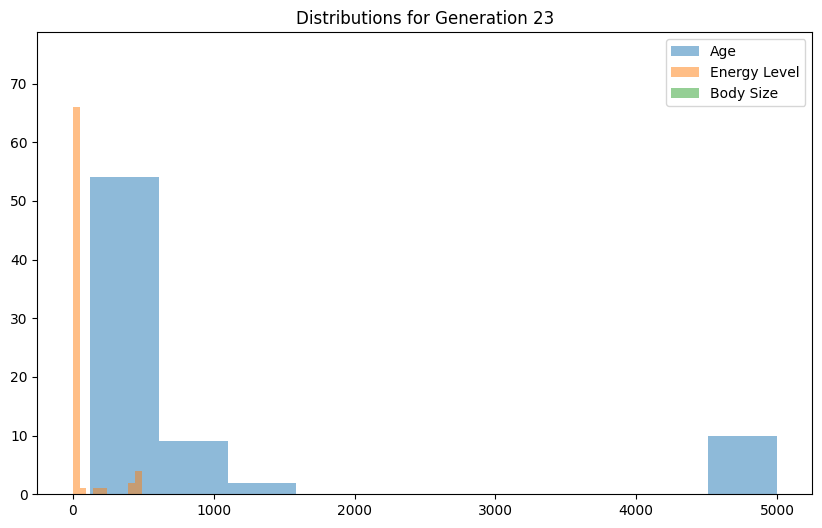

Generation 24:
  Average Age: 1348.16
  Average Energy Level: 44.84
  Average Body Size: 6.00


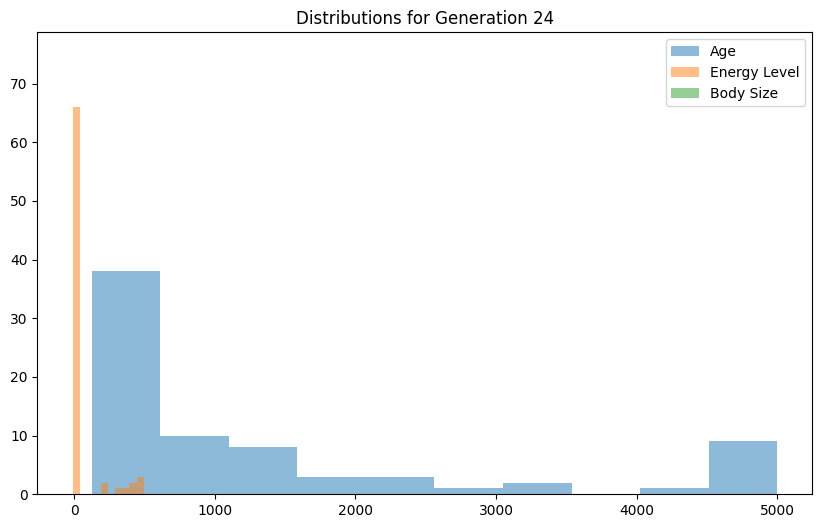

Generation 25:
  Average Age: 1666.49
  Average Energy Level: 84.39
  Average Body Size: 6.00


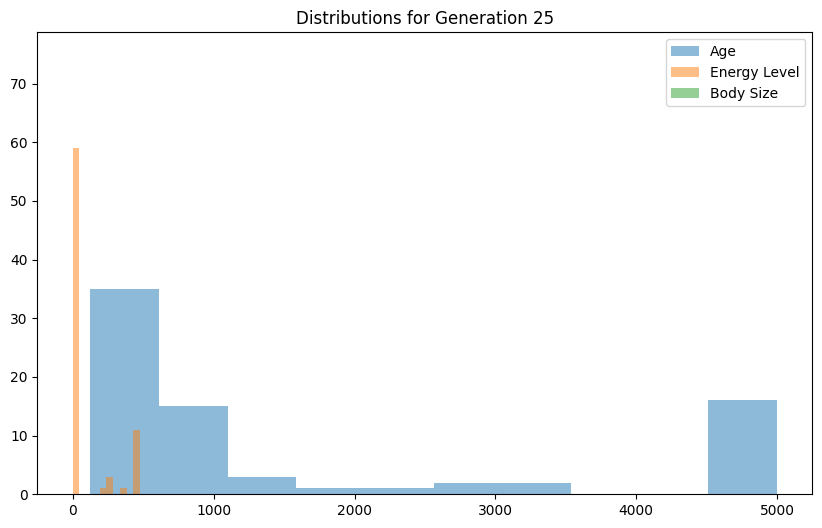

Generation 26:
  Average Age: 1050.91
  Average Energy Level: 25.73
  Average Body Size: 6.00


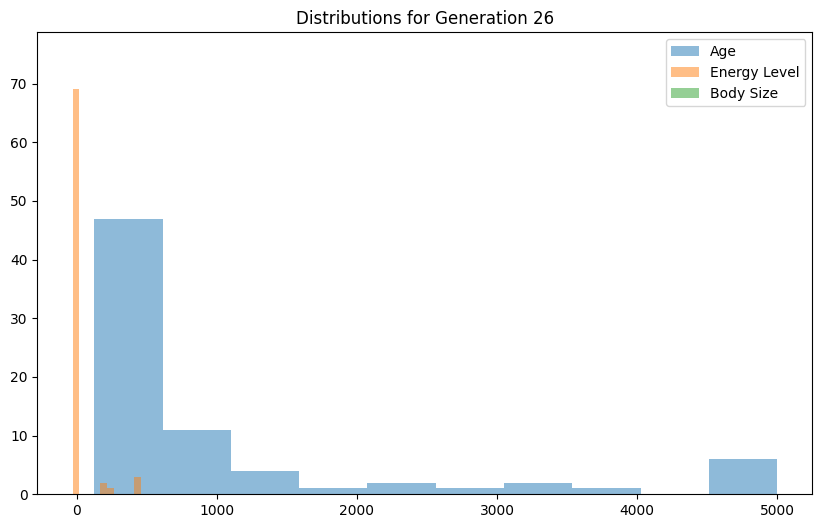

Generation 27:
  Average Age: 1232.31
  Average Energy Level: 54.10
  Average Body Size: 6.00


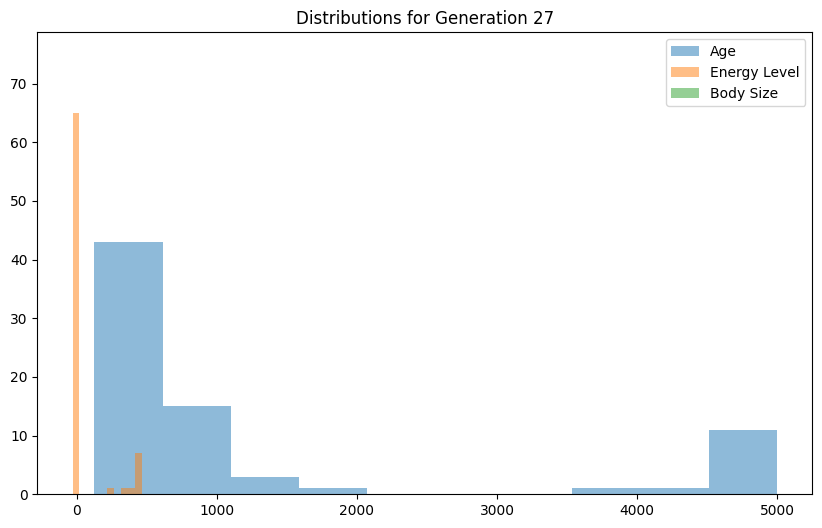

Generation 28:
  Average Age: 1372.99
  Average Energy Level: 54.20
  Average Body Size: 6.00


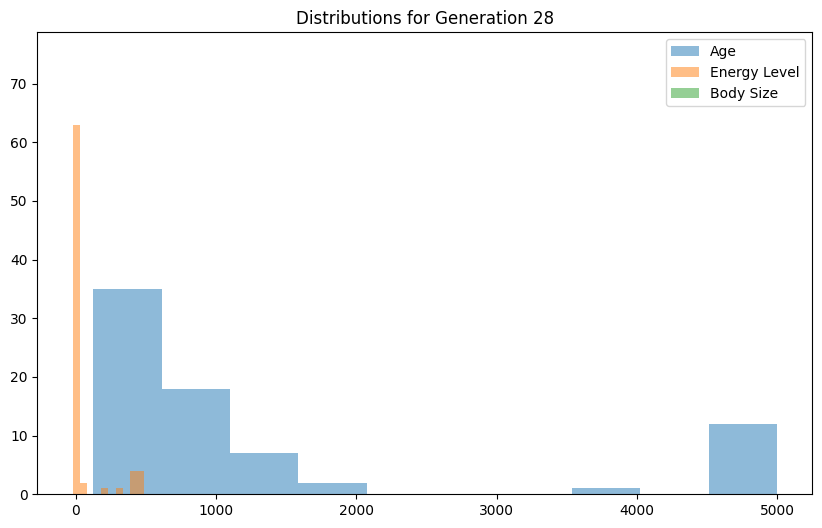

Generation 29:
  Average Age: 1247.16
  Average Energy Level: 65.98
  Average Body Size: 6.00


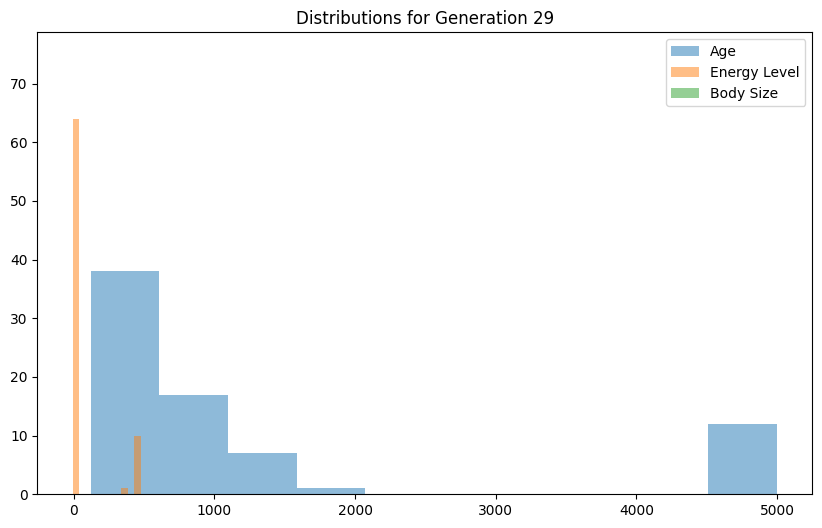

Generation 30:
  Average Age: 1210.41
  Average Energy Level: 50.91
  Average Body Size: 6.00


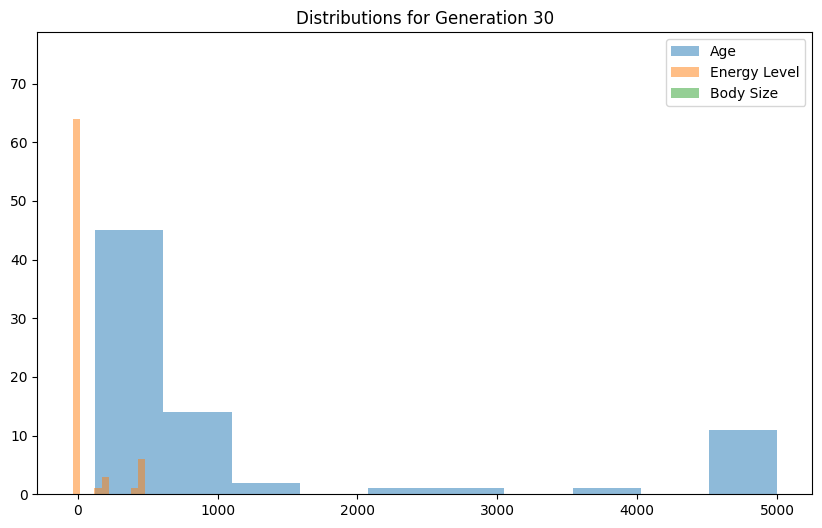

Generation 31:
  Average Age: 1060.73
  Average Energy Level: 41.75
  Average Body Size: 6.00


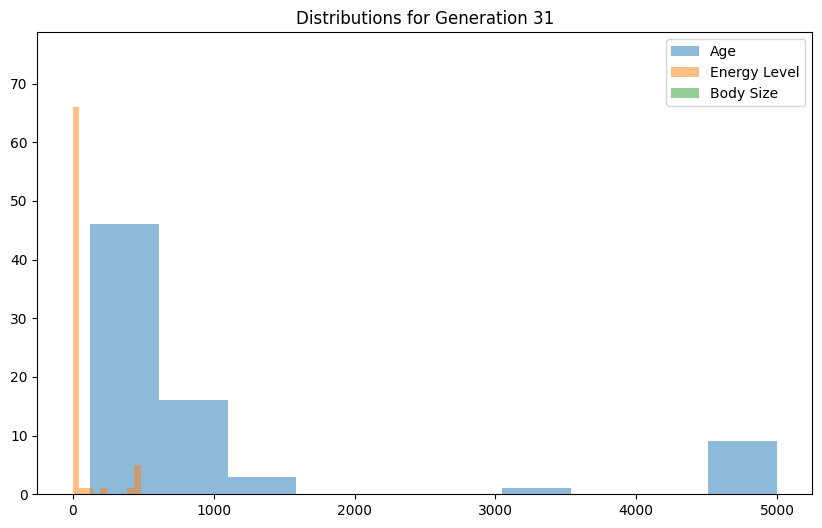

Generation 32:
  Average Age: 1015.04
  Average Energy Level: 37.46
  Average Body Size: 6.00


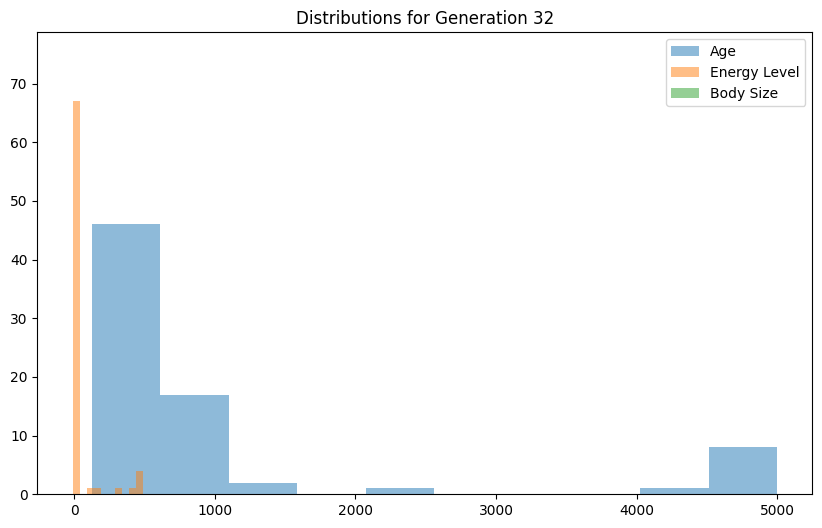

Generation 33:
  Average Age: 1132.00
  Average Energy Level: 62.47
  Average Body Size: 6.00


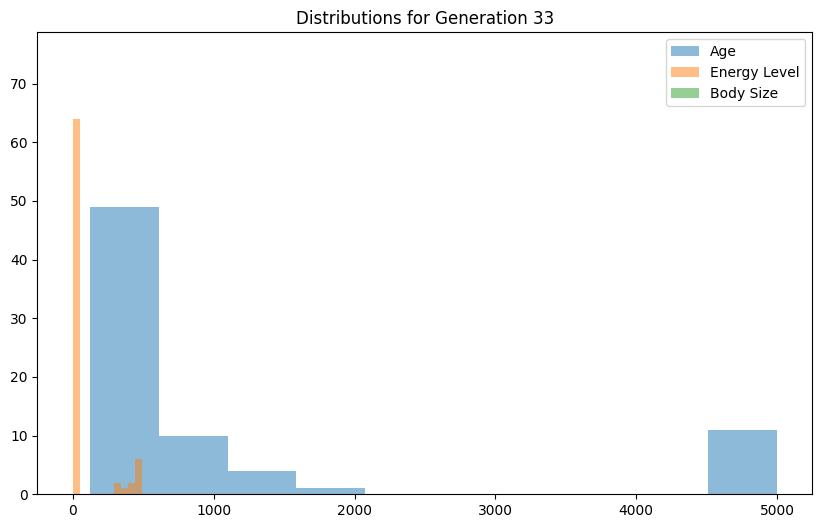

Generation 34:
  Average Age: 1672.24
  Average Energy Level: 104.83
  Average Body Size: 6.00


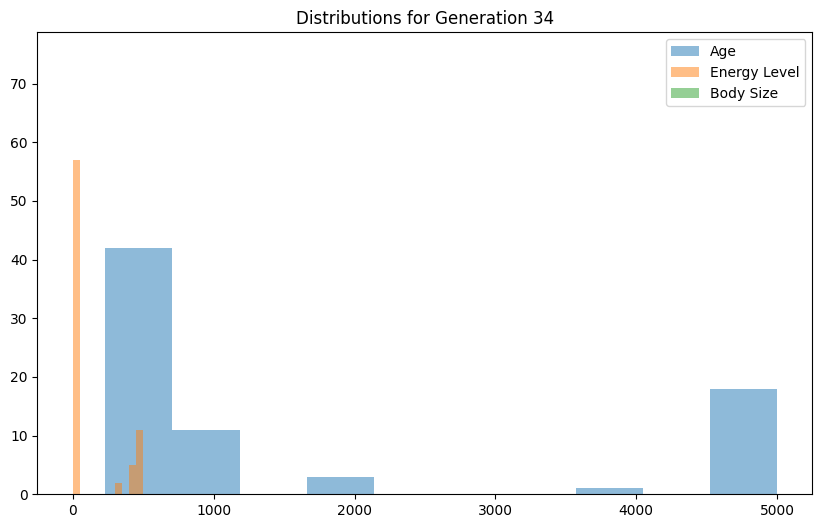

KeyError: 35

In [6]:
for i in range(len(data[generation]['agents'])):
    analyze_agent_properties(data, generation=i)


In [11]:
from scipy.spatial.distance import pdist, squareform

def genome_diversity(data, generation):
    genomes=[]
    
    for i in range(len(data[generation]["genomes"])):
        arr = np.array(data[generation]["genomes"][i])
        arr = arr.flatten()
        genomes.append(arr)
    
    if len(genomes) > 1:
        distances = pdist(genomes)  # Pairwise distances
        avg_distance = np.mean(distances)
        print(f"Average Genome Diversity (Generation {generation}): {avg_distance:.4f}")
        return avg_distance
    else:
        print("Not enough genomes to calculate diversity.")

# Example usage
genome_diversity(data, generation=1)


Average Genome Diversity (Generation 1): 0.6701


0.6701422245203851

In [12]:
num=len(data)
num=num-1
print(num)
diversity=[]
for i in range(num):
    diversity.append(genome_diversity(data, generation=i))

print(diversity)


34
Average Genome Diversity (Generation 0): 0.6850
Average Genome Diversity (Generation 1): 0.6701
Average Genome Diversity (Generation 2): 0.6782
Average Genome Diversity (Generation 3): 0.6804
Average Genome Diversity (Generation 4): 0.6973
Average Genome Diversity (Generation 5): 0.6955
Average Genome Diversity (Generation 6): 0.6611
Average Genome Diversity (Generation 7): 0.6826
Average Genome Diversity (Generation 8): 0.6940
Average Genome Diversity (Generation 9): 0.7138
Average Genome Diversity (Generation 10): 0.7106
Average Genome Diversity (Generation 11): 0.7008
Average Genome Diversity (Generation 12): 0.7061
Average Genome Diversity (Generation 13): 0.7162
Average Genome Diversity (Generation 14): 0.6825
Average Genome Diversity (Generation 15): 0.6658
Average Genome Diversity (Generation 16): 0.6744
Average Genome Diversity (Generation 17): 0.6753
Average Genome Diversity (Generation 18): 0.6888
Average Genome Diversity (Generation 19): 0.6655
Average Genome Diversity (G

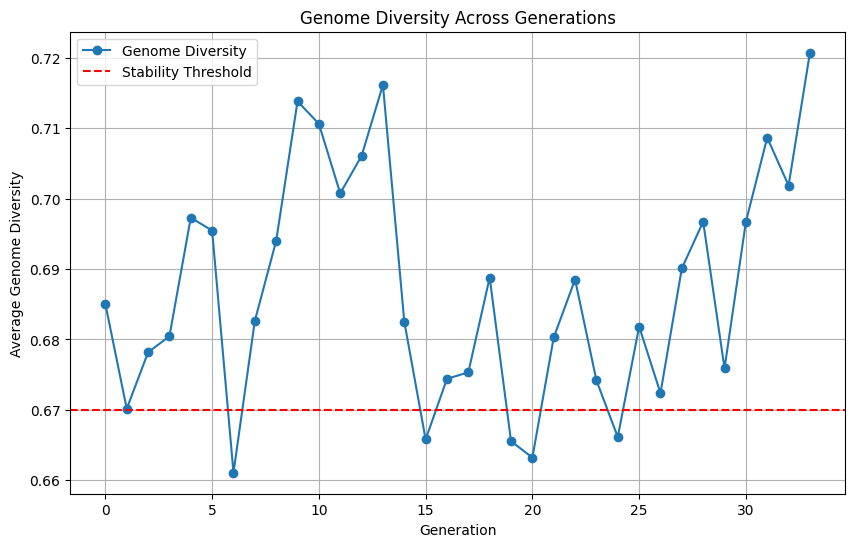

In [13]:
import matplotlib.pyplot as plt

# Data
generations = list(range(len(diversity)))
diversity = diversity

# Plot
plt.figure(figsize=(10, 6))
plt.plot(generations, diversity, marker='o', label="Genome Diversity")
plt.axhline(y=0.67, color='r', linestyle='--', label="Stability Threshold")
plt.xlabel("Generation")
plt.ylabel("Average Genome Diversity")
plt.title("Genome Diversity Across Generations")
plt.legend()
plt.grid(True)
plt.show()


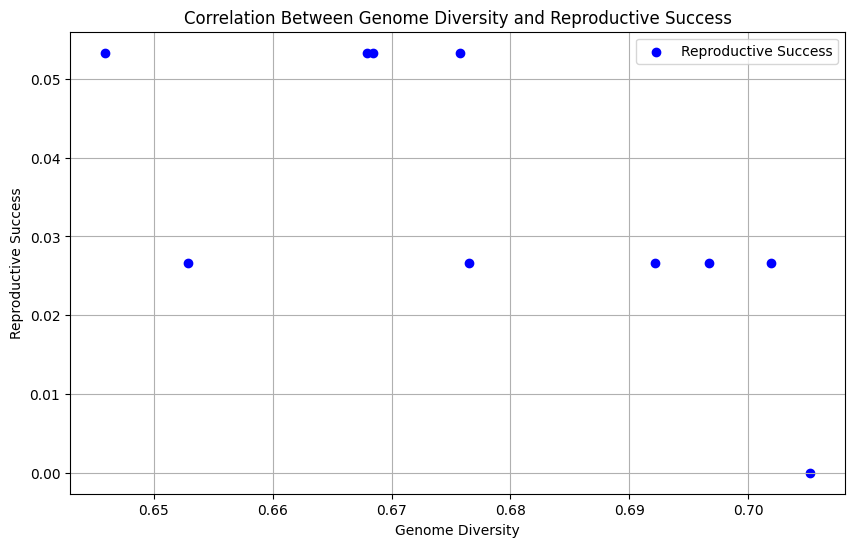

In [73]:
# Example: Correlating diversity with reproductive success
diversity = [0.6679, 0.6459, 0.6529, 0.6684, 0.6922, 0.6758, 0.6765, 0.7052, 0.6967, 0.7019]
performance_metrics = [
    np.mean([agent["no_of_matings_as_female"] for agent in data[gen]["agents"]])
    for gen in range(len(diversity))
]

# Plot the correlation
plt.figure(figsize=(10, 6))
plt.scatter(diversity, performance_metrics, color="blue", label="Reproductive Success")
plt.xlabel("Genome Diversity")
plt.ylabel("Reproductive Success")
plt.title("Correlation Between Genome Diversity and Reproductive Success")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
print(  data[1]["genomes"][1])

[[-0.18555383 -0.06343045 -0.00270219  0.03606587]
 [-0.00220651  0.04774716  0.09599079  0.19694221]
 [ 0.07165995  0.06464075 -0.02385021 -0.03312851]
 [ 0.04324668 -0.09477516 -0.04105247 -0.16099913]
 [ 0.10608516  0.23422303  0.0734667   0.08010443]
 [ 0.01962616 -0.16494152 -0.05580578 -0.10679612]]


Generation 1:
  Total Matings as Female: 4
  Total Matings as Male: 2
  Average Reproductive Success: 6.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


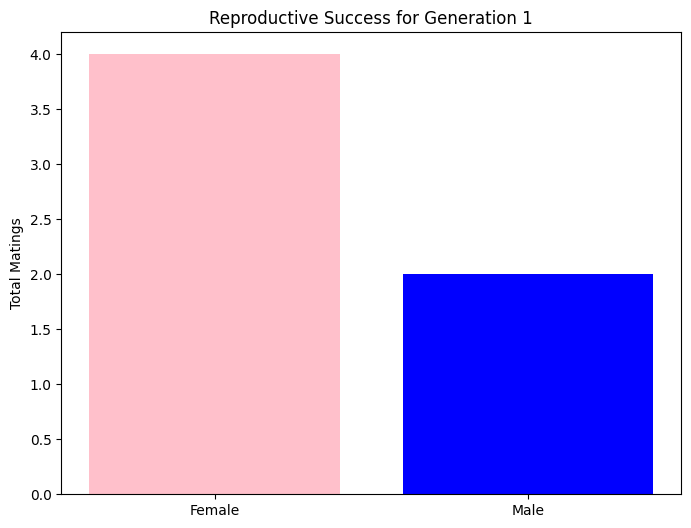

In [52]:
def reproductive_success(data, generation):
    agents = data[generation]["agents"]
    matings_as_female = [agent["no_of_matings_as_female"] for agent in agents]
    matings_as_male = [agent["no_of_matings_as_male"] for agent in agents]
    reproductive_success = [agent["reproductive_success"] for agent in agents]

    print(f"Generation {generation}:")
    print(f"  Total Matings as Female: {sum(matings_as_female)}")
    print(f"  Total Matings as Male: {sum(matings_as_male)}")
    print(f"  Average Reproductive Success: {sum(reproductive_success):.2f}")
    print(reproductive_success)
    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(["Female", "Male"], [sum(matings_as_female), sum(matings_as_male)], color=['pink', 'blue'])
    plt.title(f"Reproductive Success for Generation {generation}")
    plt.ylabel("Total Matings")
    plt.show()

# Example usage
reproductive_success(data, generation=1)




39
Generation 0:
  Total Matings as Female: 4
  Total Matings as Male: 0
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


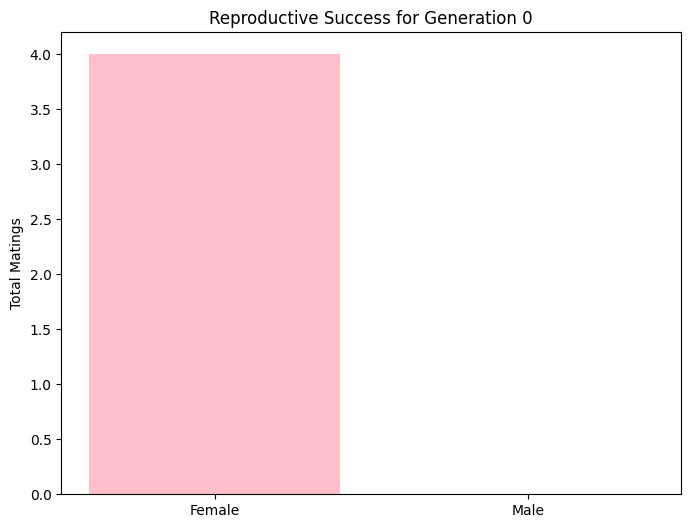

Generation 1:
  Total Matings as Female: 4
  Total Matings as Male: 2
  Average Reproductive Success: 6.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


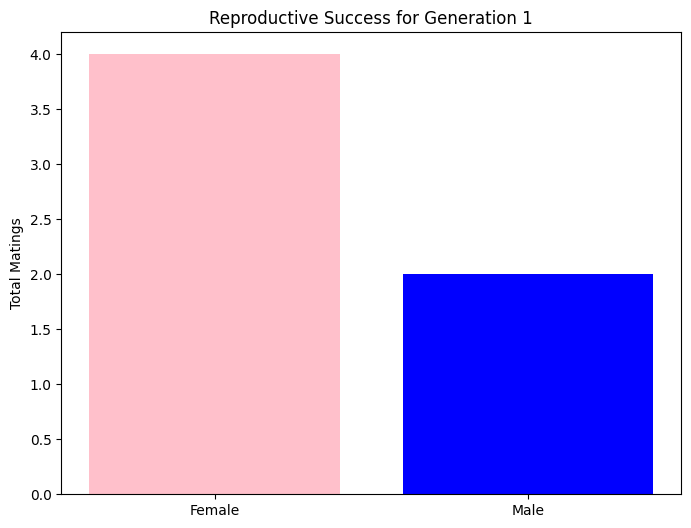

Generation 2:
  Total Matings as Female: 2
  Total Matings as Male: 6
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]


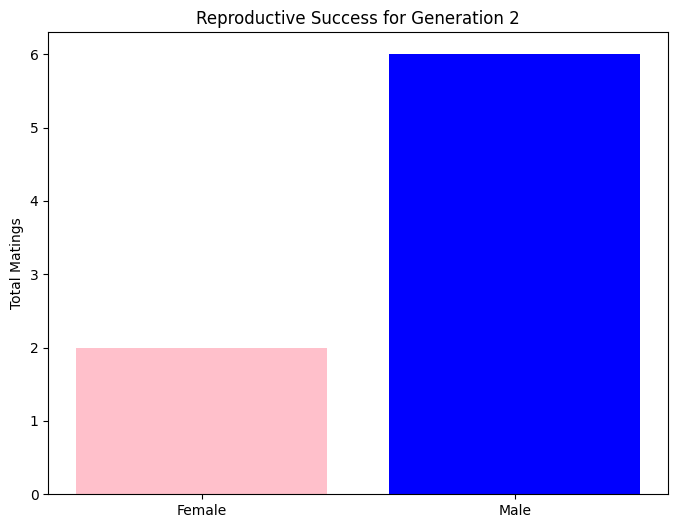

Generation 3:
  Total Matings as Female: 4
  Total Matings as Male: 2
  Average Reproductive Success: 6.00
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]


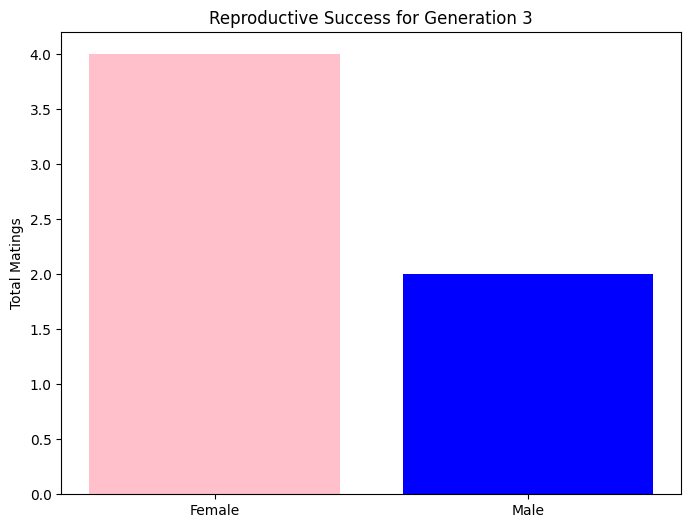

Generation 4:
  Total Matings as Female: 2
  Total Matings as Male: 2
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


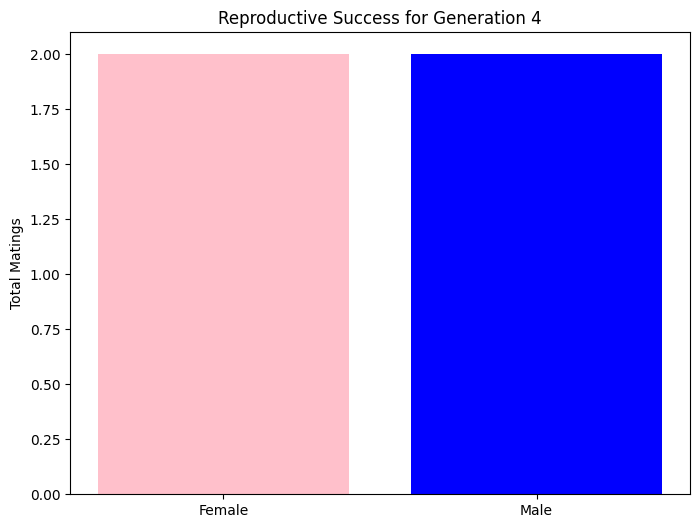

Generation 5:
  Total Matings as Female: 4
  Total Matings as Male: 0
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


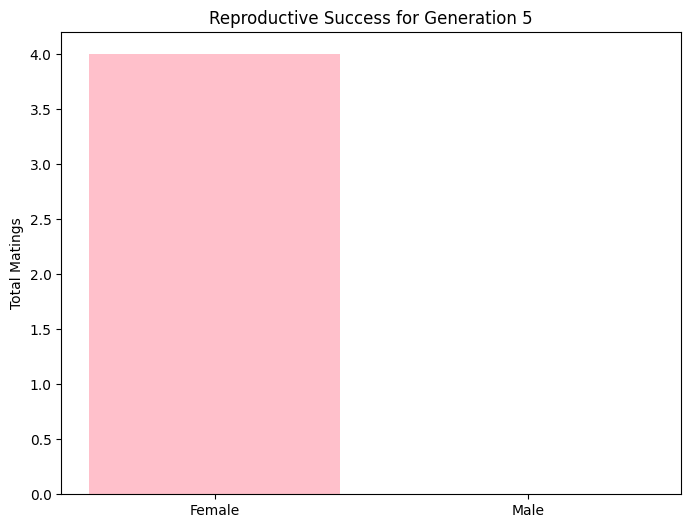

Generation 6:
  Total Matings as Female: 2
  Total Matings as Male: 2
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]


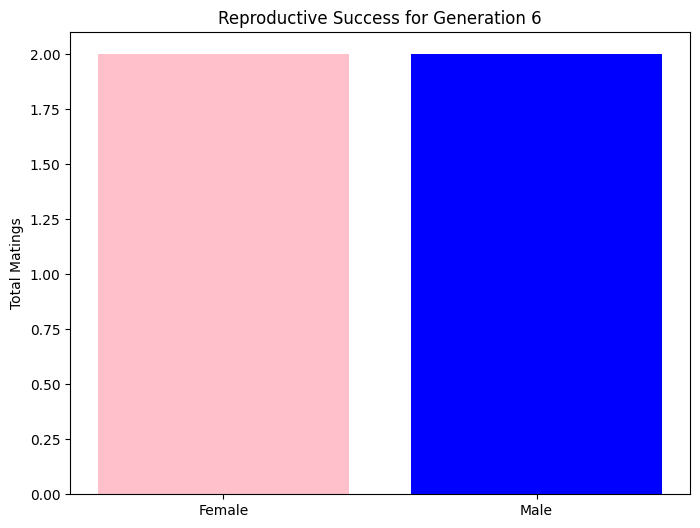

Generation 7:
  Total Matings as Female: 0
  Total Matings as Male: 6
  Average Reproductive Success: 6.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


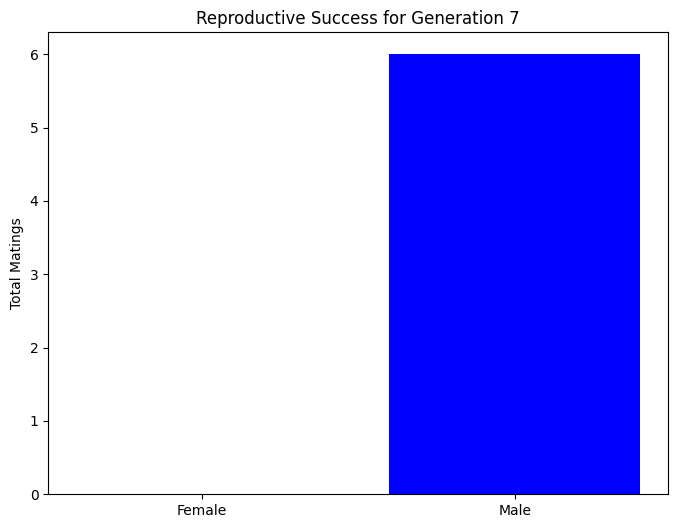

Generation 8:
  Total Matings as Female: 2
  Total Matings as Male: 6
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


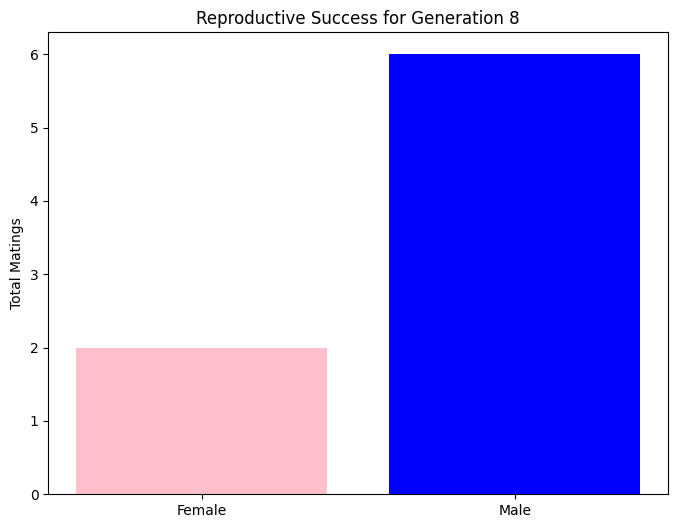

Generation 9:
  Total Matings as Female: 2
  Total Matings as Male: 8
  Average Reproductive Success: 10.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


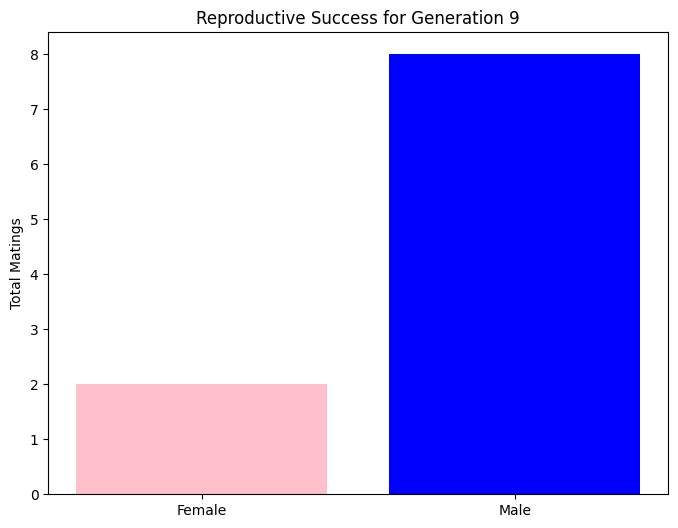

Generation 10:
  Total Matings as Female: 4
  Total Matings as Male: 6
  Average Reproductive Success: 10.00
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


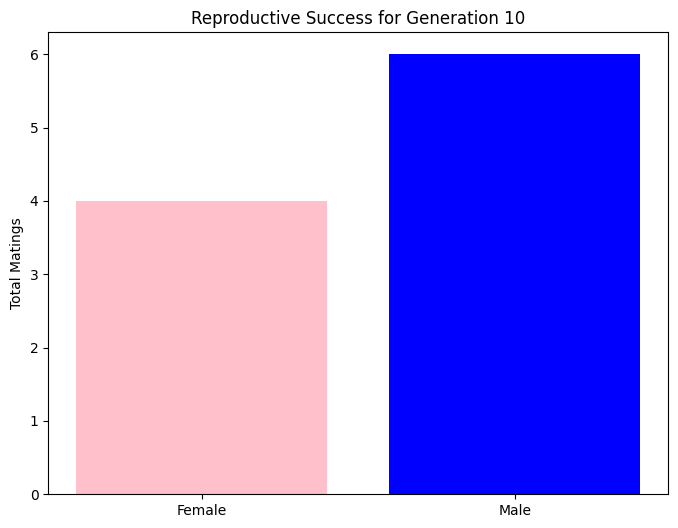

Generation 11:
  Total Matings as Female: 0
  Total Matings as Male: 4
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


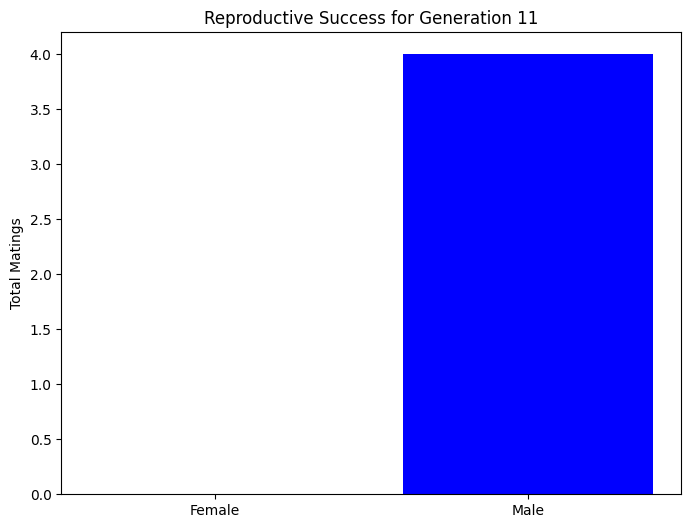

Generation 12:
  Total Matings as Female: 0
  Total Matings as Male: 4
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


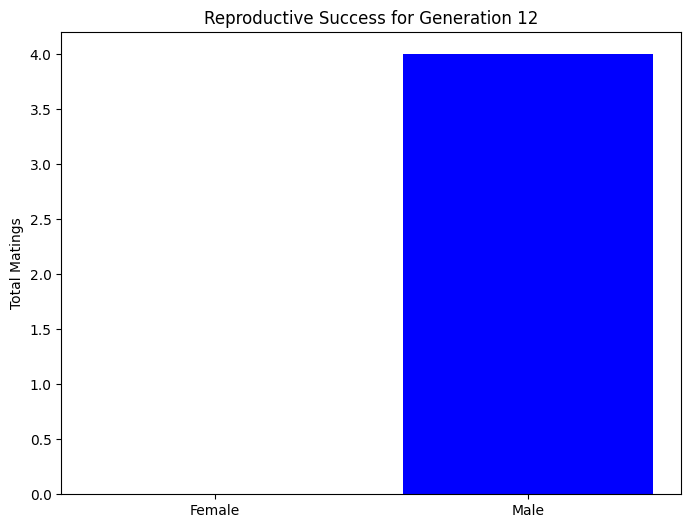

Generation 13:
  Total Matings as Female: 4
  Total Matings as Male: 4
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


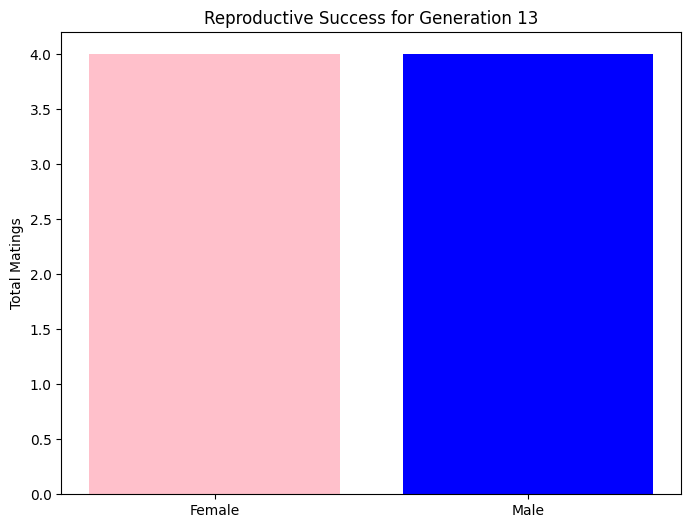

Generation 14:
  Total Matings as Female: 4
  Total Matings as Male: 4
  Average Reproductive Success: 8.00
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


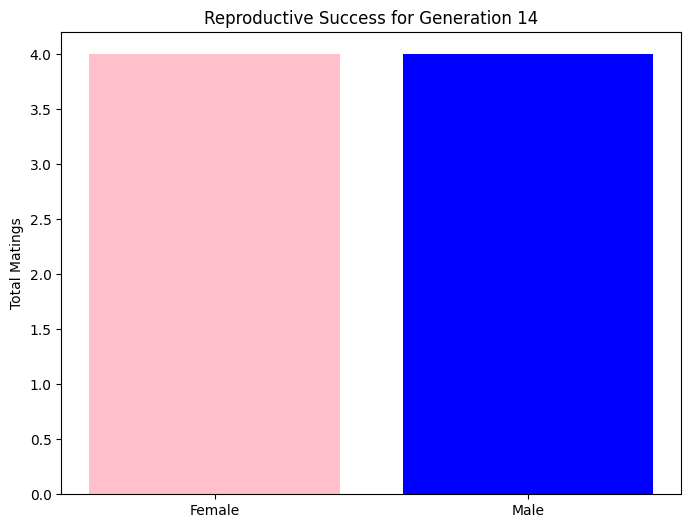

Generation 15:
  Total Matings as Female: 6
  Total Matings as Male: 2
  Average Reproductive Success: 8.00
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


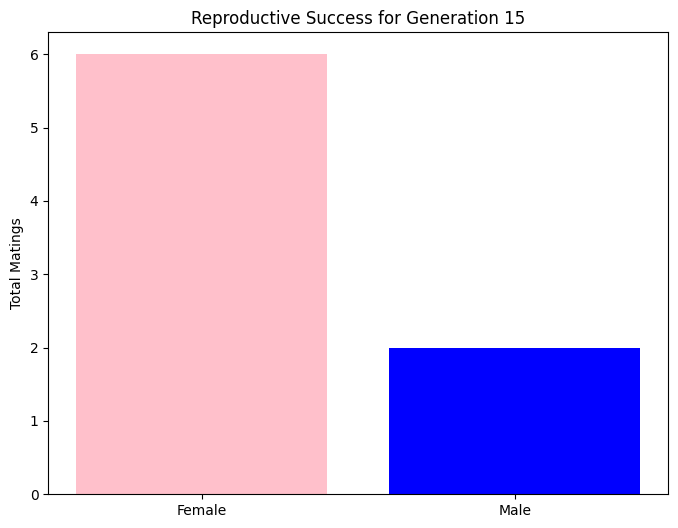

Generation 16:
  Total Matings as Female: 0
  Total Matings as Male: 2
  Average Reproductive Success: 2.00
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


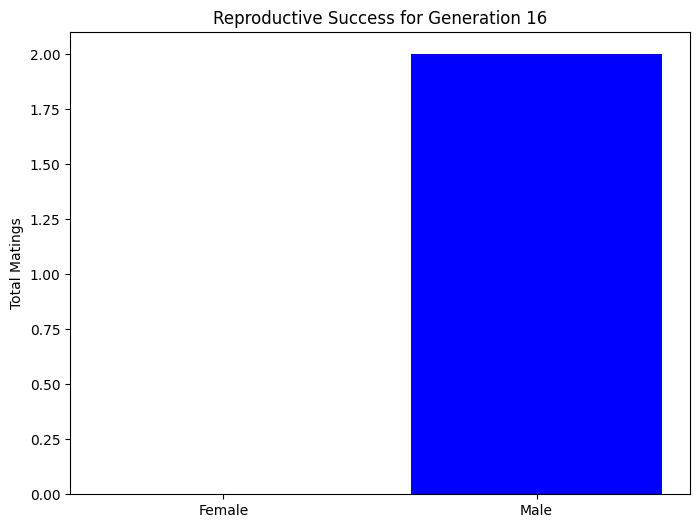

Generation 17:
  Total Matings as Female: 8
  Total Matings as Male: 4
  Average Reproductive Success: 12.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


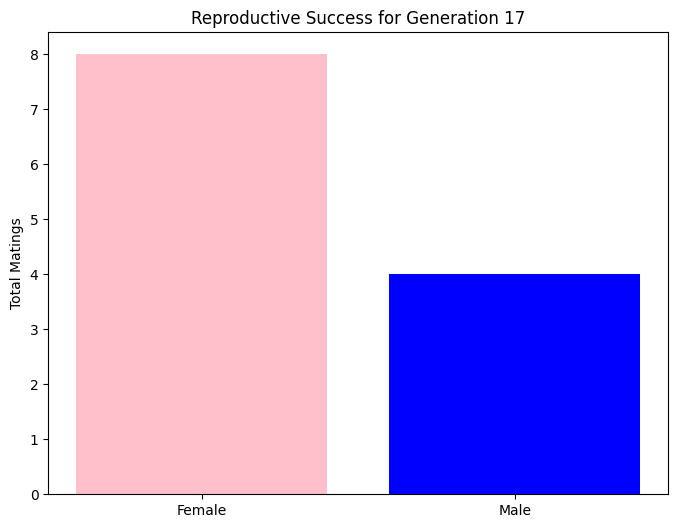

Generation 18:
  Total Matings as Female: 6
  Total Matings as Male: 2
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


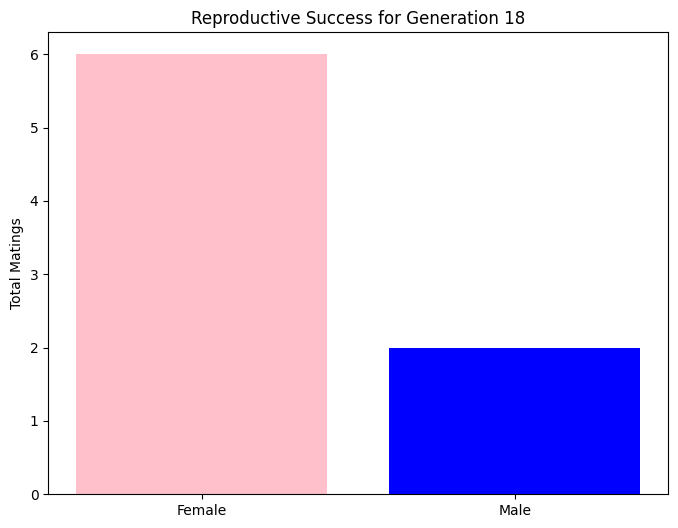

Generation 19:
  Total Matings as Female: 4
  Total Matings as Male: 0
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


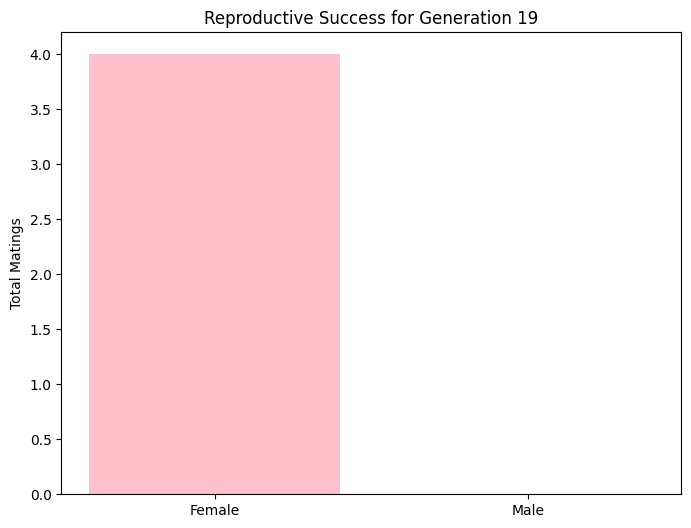

Generation 20:
  Total Matings as Female: 10
  Total Matings as Male: 4
  Average Reproductive Success: 14.00
[2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


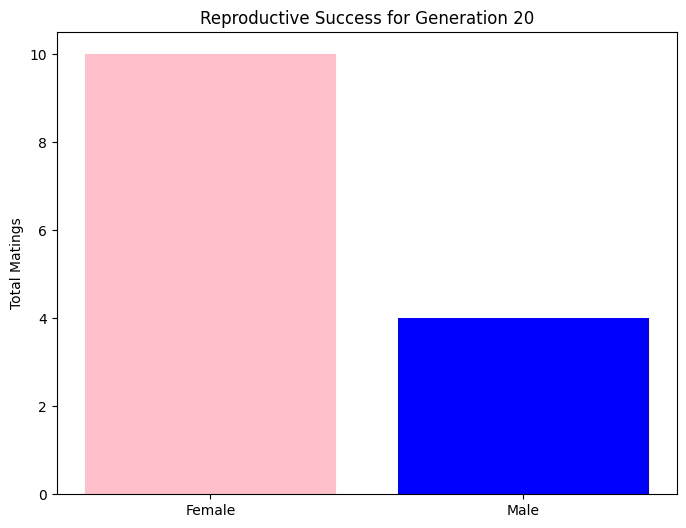

Generation 21:
  Total Matings as Female: 6
  Total Matings as Male: 2
  Average Reproductive Success: 8.00
[0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


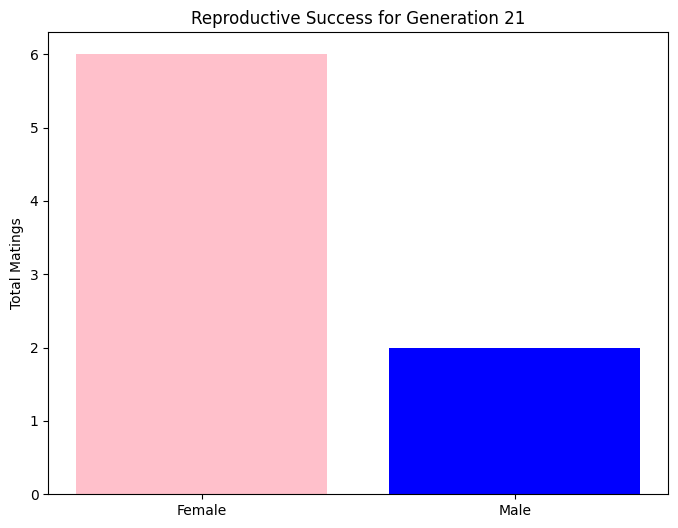

Generation 22:
  Total Matings as Female: 2
  Total Matings as Male: 8
  Average Reproductive Success: 10.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


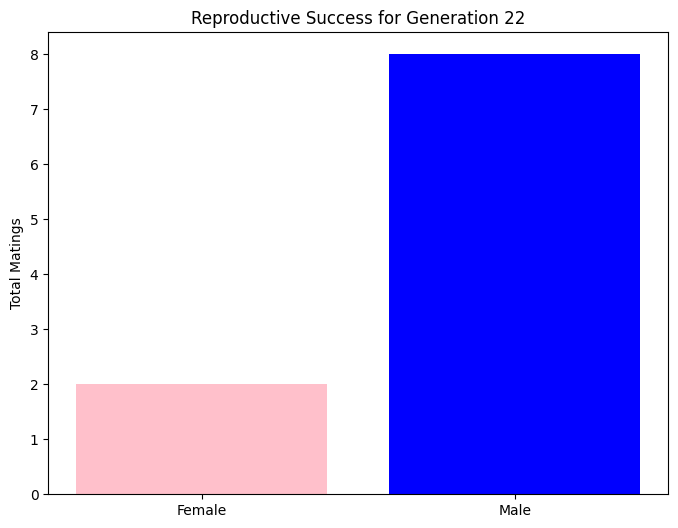

Generation 23:
  Total Matings as Female: 2
  Total Matings as Male: 2
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


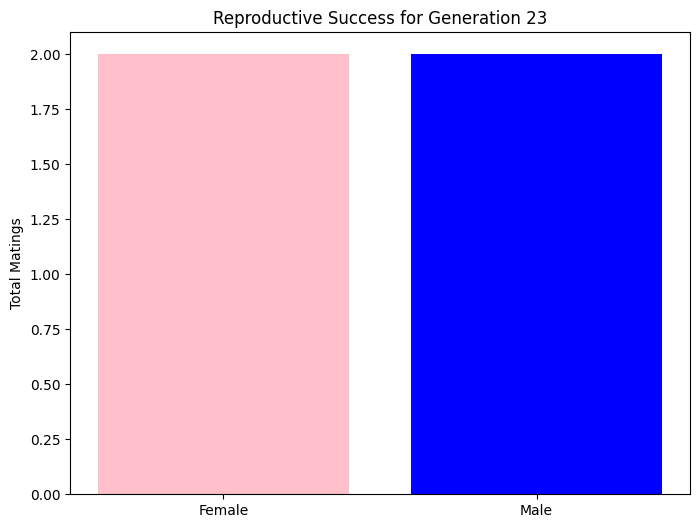

Generation 24:
  Total Matings as Female: 4
  Total Matings as Male: 4
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]


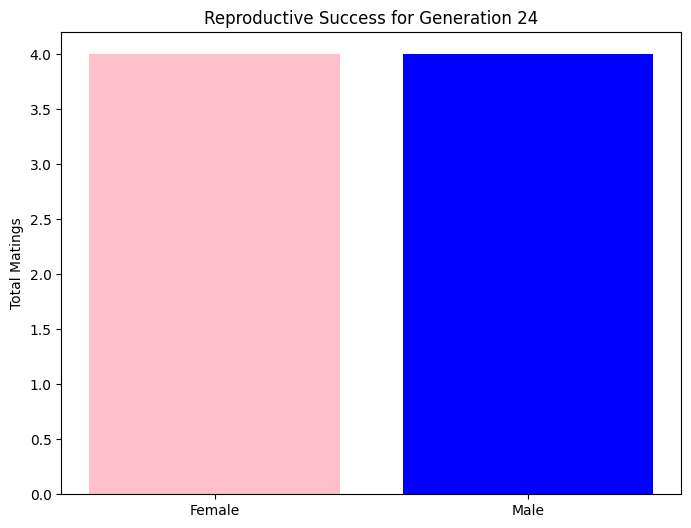

Generation 25:
  Total Matings as Female: 4
  Total Matings as Male: 0
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]


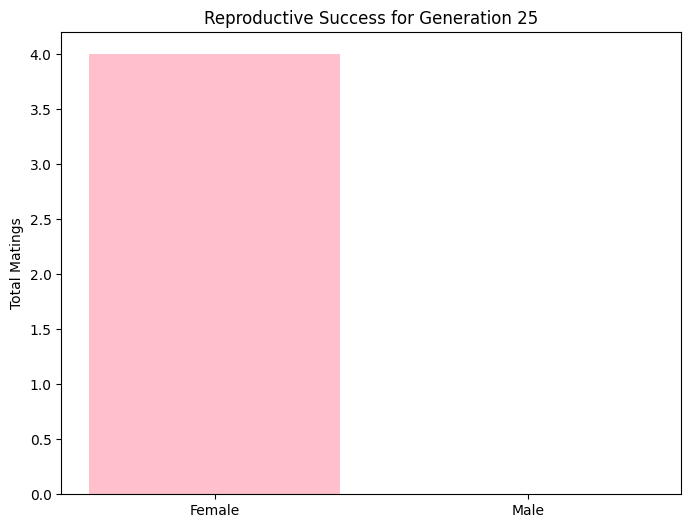

Generation 26:
  Total Matings as Female: 8
  Total Matings as Male: 2
  Average Reproductive Success: 10.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


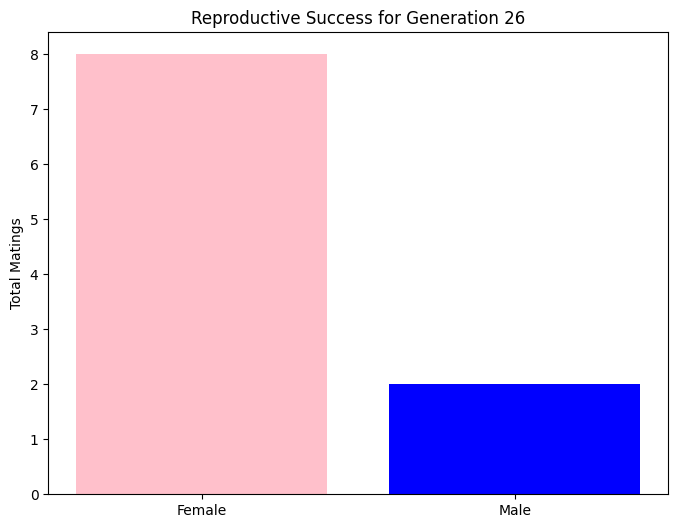

Generation 27:
  Total Matings as Female: 4
  Total Matings as Male: 4
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


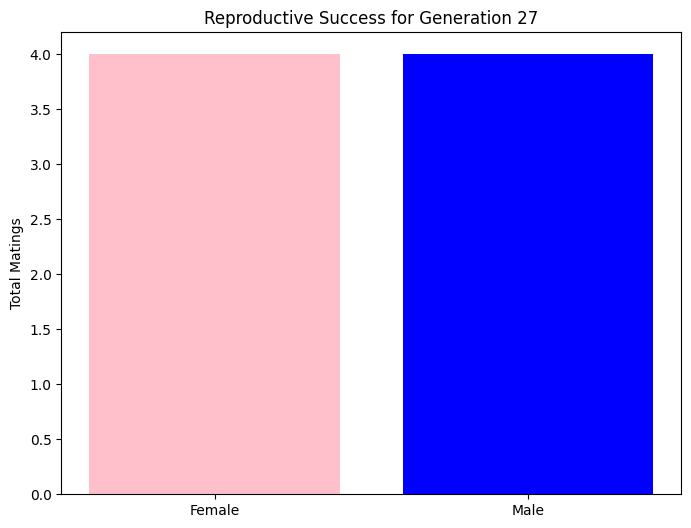

Generation 28:
  Total Matings as Female: 2
  Total Matings as Male: 4
  Average Reproductive Success: 6.00
[0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


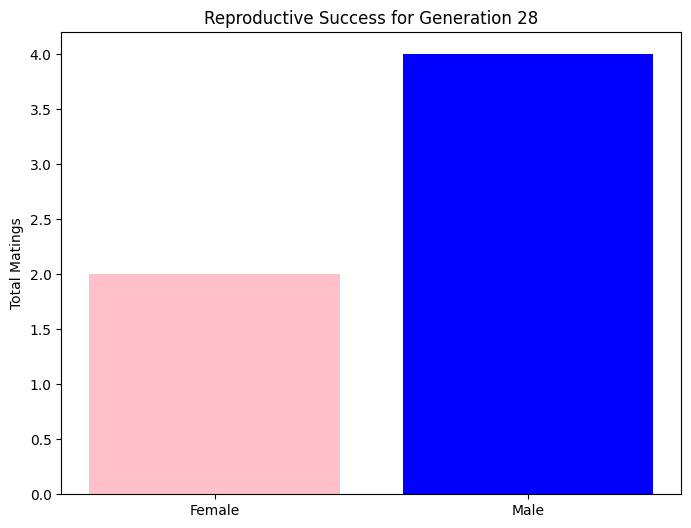

Generation 29:
  Total Matings as Female: 8
  Total Matings as Male: 0
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]


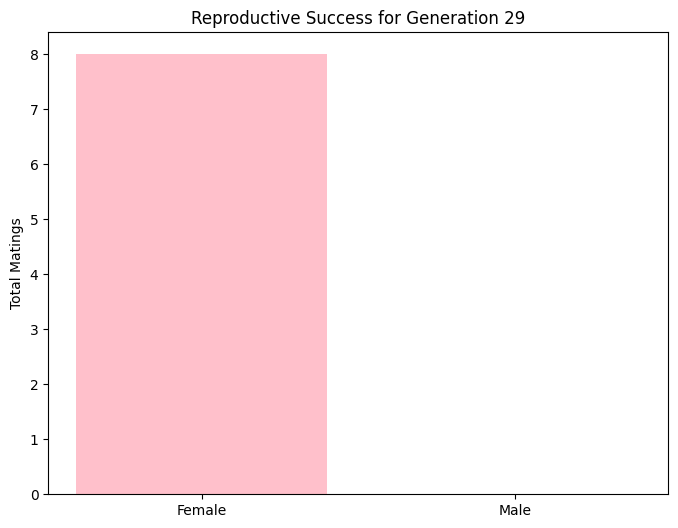

Generation 30:
  Total Matings as Female: 4
  Total Matings as Male: 2
  Average Reproductive Success: 6.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


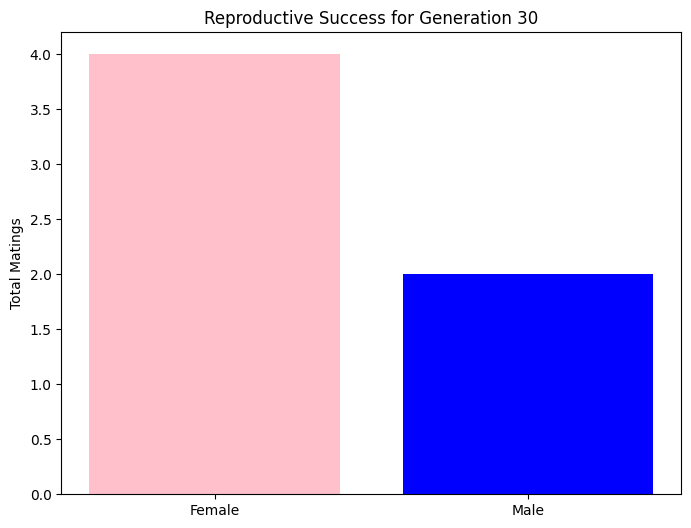

Generation 31:
  Total Matings as Female: 6
  Total Matings as Male: 12
  Average Reproductive Success: 18.00
[0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]


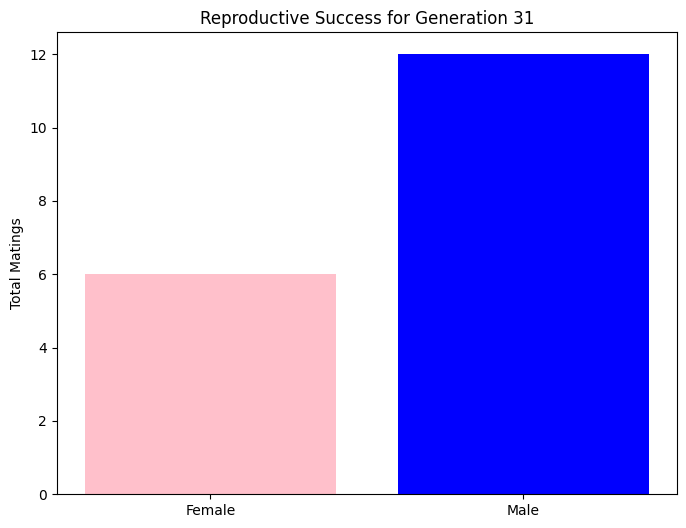

Generation 32:
  Total Matings as Female: 6
  Total Matings as Male: 2
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]


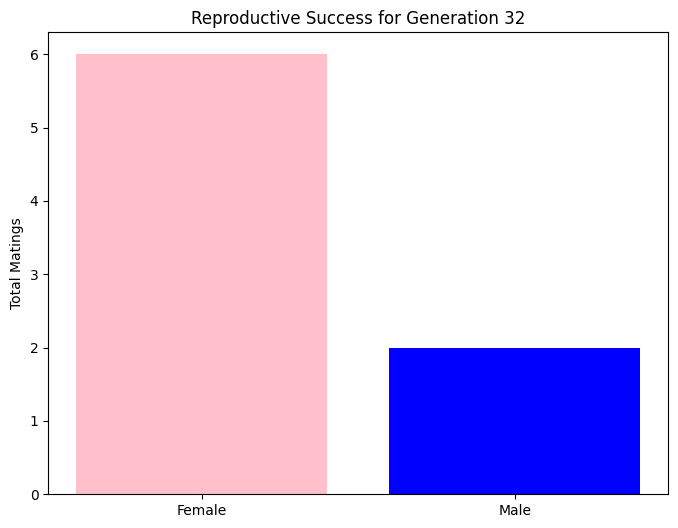

Generation 33:
  Total Matings as Female: 12
  Total Matings as Male: 6
  Average Reproductive Success: 18.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0]


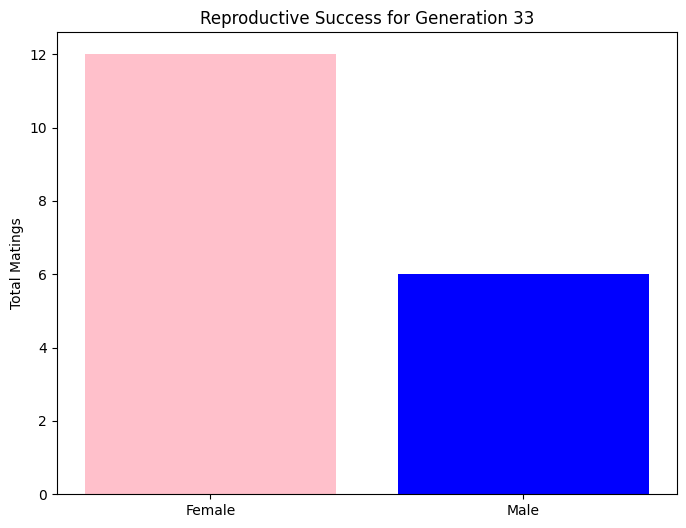

Generation 34:
  Total Matings as Female: 6
  Total Matings as Male: 4
  Average Reproductive Success: 10.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


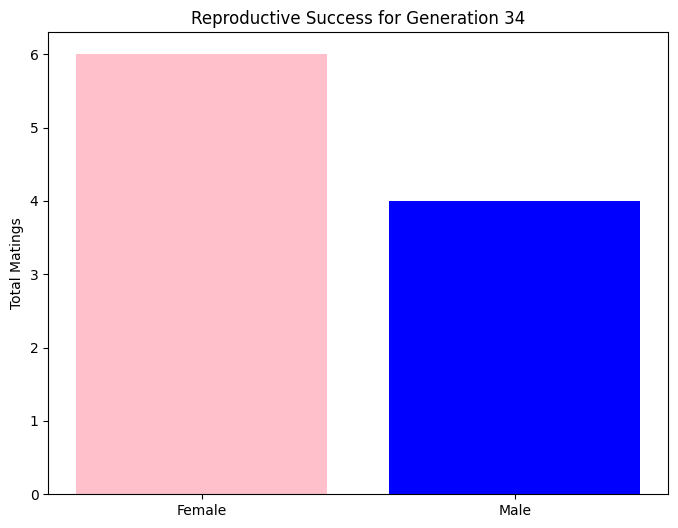

Generation 35:
  Total Matings as Female: 2
  Total Matings as Male: 2
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


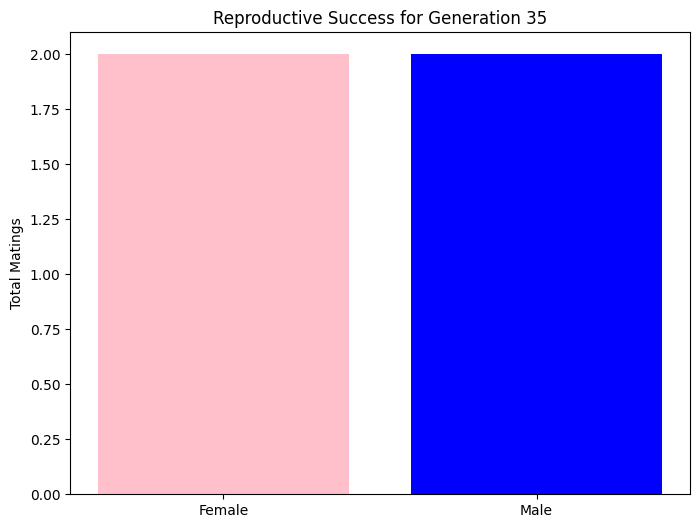

Generation 36:
  Total Matings as Female: 6
  Total Matings as Male: 2
  Average Reproductive Success: 8.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


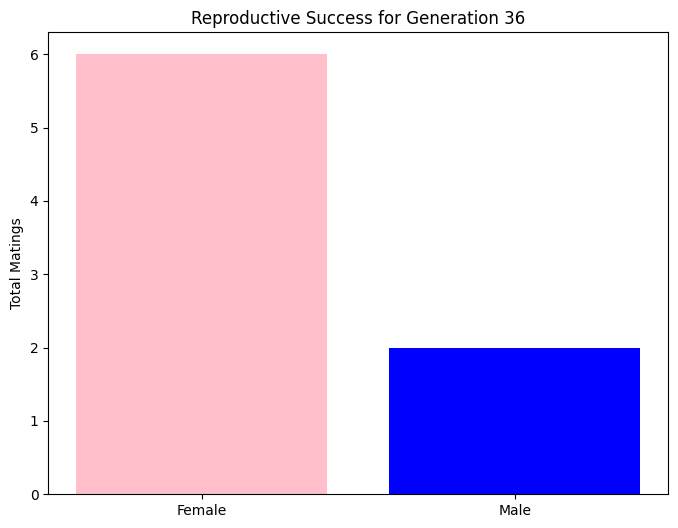

Generation 37:
  Total Matings as Female: 2
  Total Matings as Male: 4
  Average Reproductive Success: 6.00
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


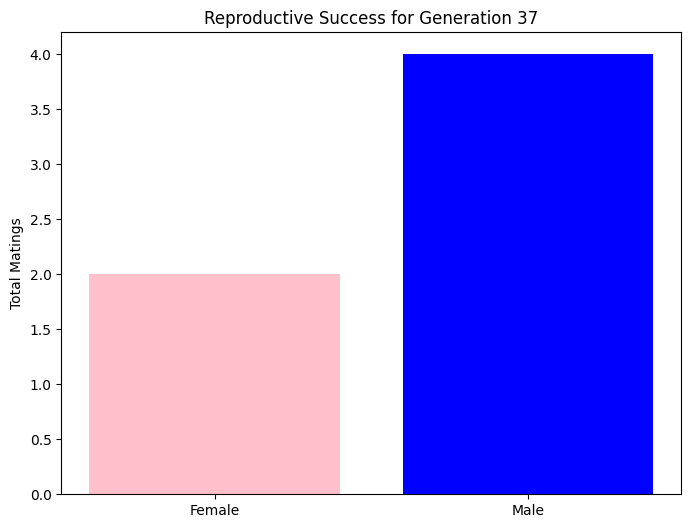

Generation 38:
  Total Matings as Female: 2
  Total Matings as Male: 2
  Average Reproductive Success: 4.00
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]


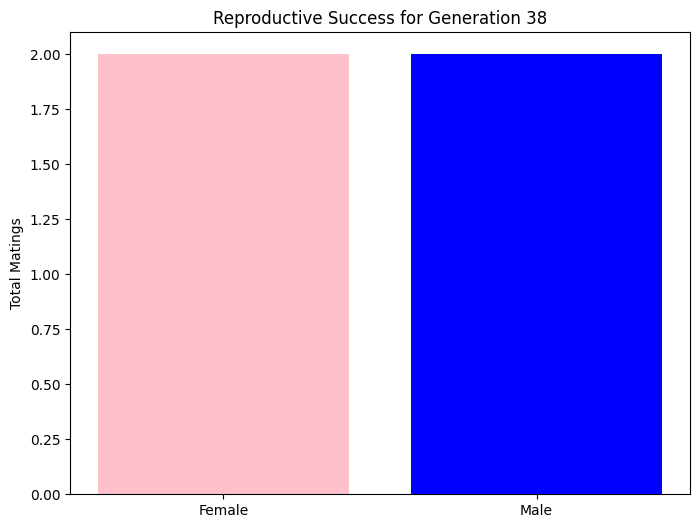

In [53]:
num=len(data)
print(num)
for i in range(num):
    reproductive_success(data, generation=i)


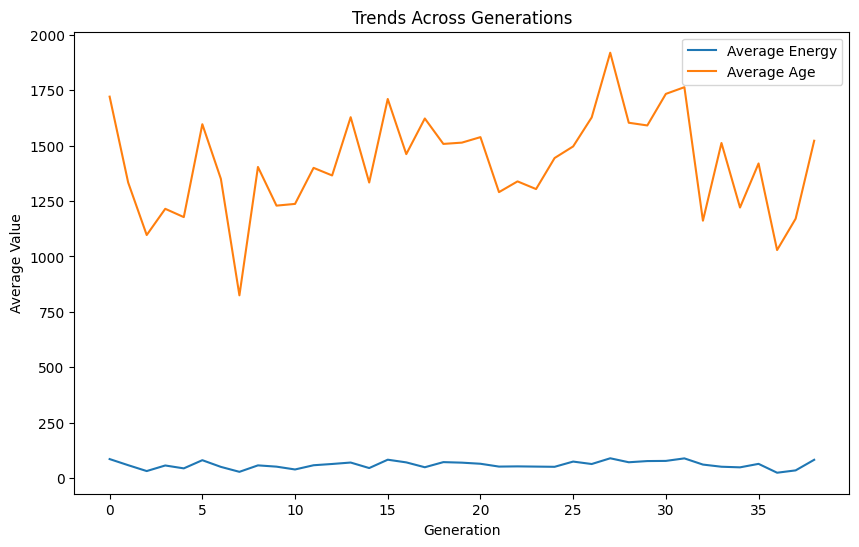

In [54]:
def plot_generational_trends(data):
    generations = sorted(data.keys())
    avg_energies = []
    avg_ages = []

    for gen in generations:
        agents = data[gen]["agents"]
        avg_energies.append(np.mean([agent["energy_level"] for agent in agents]))
        avg_ages.append(np.mean([agent["age"] for agent in agents]))

    plt.figure(figsize=(10, 6))
    plt.plot(generations, avg_energies, label="Average Energy")
    plt.plot(generations, avg_ages, label="Average Age")
    plt.xlabel("Generation")
    plt.ylabel("Average Value")
    plt.title("Trends Across Generations")
    plt.legend()
    plt.show()

# Example usage
plot_generational_trends(data)


Correlation Matrix:
                       Age    Energy  mating as female  mating as male
Age               1.000000  0.888644               NaN       -0.070838
Energy            0.888644  1.000000               NaN       -0.052643
mating as female       NaN       NaN               NaN             NaN
mating as male   -0.070838 -0.052643               NaN        1.000000


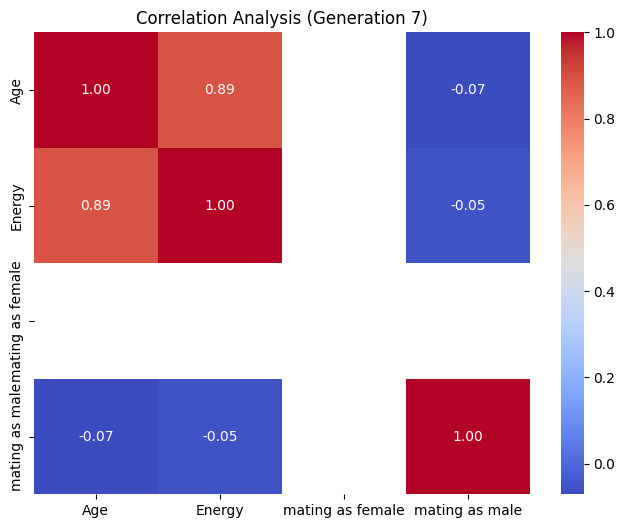

In [58]:
import pandas as pd
import seaborn as sns

def analyze_correlations(data, generation):
    agents = data[generation]["agents"]
    # Create a DataFrame of agent properties
    df = pd.DataFrame({
        "Age": [agent["age"] for agent in agents],
        "Energy": [agent["energy_level"] for agent in agents],
        "mating as female": [agent["no_of_matings_as_female"] for agent in agents],
        "mating as male": [agent["no_of_matings_as_male"] for agent in agents]
    })

    # Compute the correlation matrix
    correlation_matrix = df.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Visualize the correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Analysis (Generation {generation})")
    plt.show()

# Example usage
analyze_correlations(data, generation=7)


State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


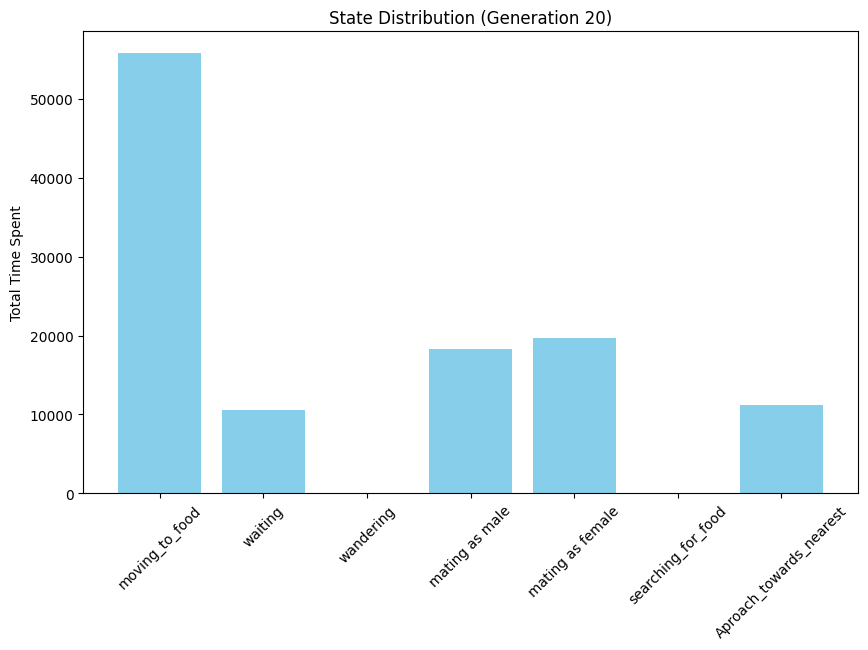

In [61]:
def analyze_agent_states(data, generation):
    agents = data[generation]["agents"]
    state_counts = {}

    # Aggregate state counters across agents
    for agent in agents:
        for state, count in agent["state_counter_dict"].items():
            if state not in state_counts:
                state_counts[state] = 0
            state_counts[state] += sum(count)

    # Print state counts
    print(f"State Counts (Generation {generation}):")
    for state, count in state_counts.items():
        print(f"  {state}: {count}")

    # Visualize state distributions
    plt.figure(figsize=(10, 6))
    plt.bar(state_counts.keys(), state_counts.values(), color="skyblue")
    plt.xticks(rotation=45)
    plt.title(f"State Distribution (Generation {generation})")
    plt.ylabel("Total Time Spent")
    plt.show()

# Example usage
analyze_agent_states(data, generation=20)


39
State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


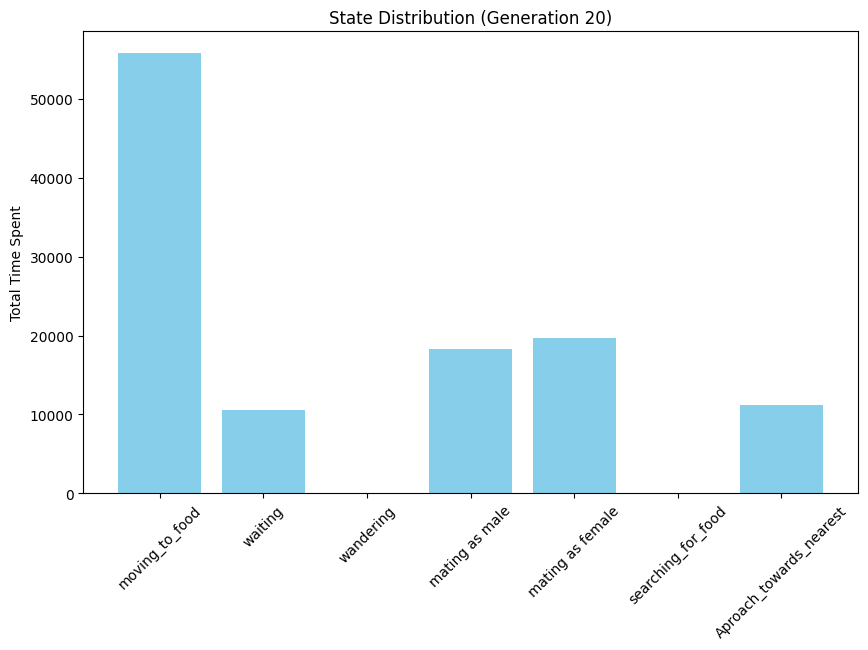

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


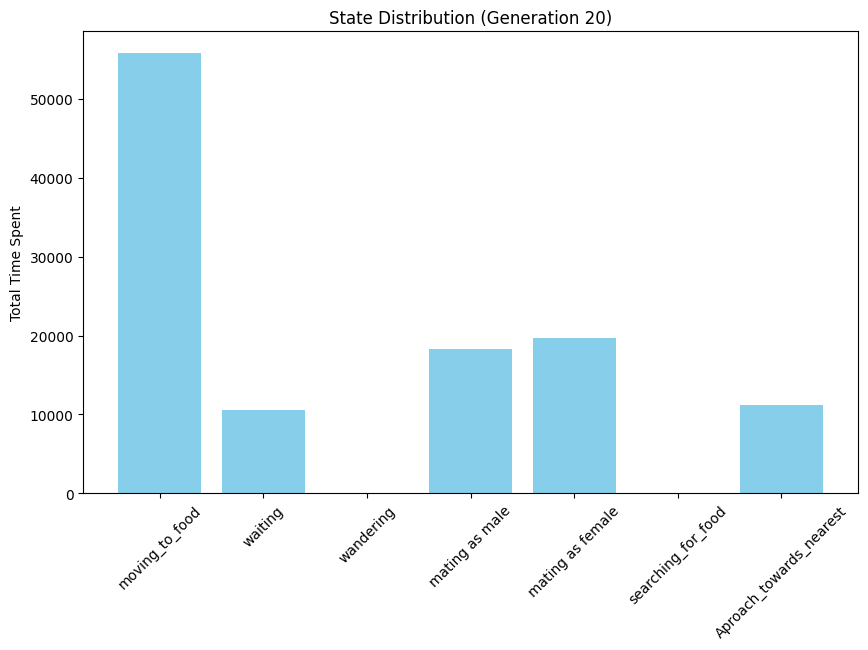

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


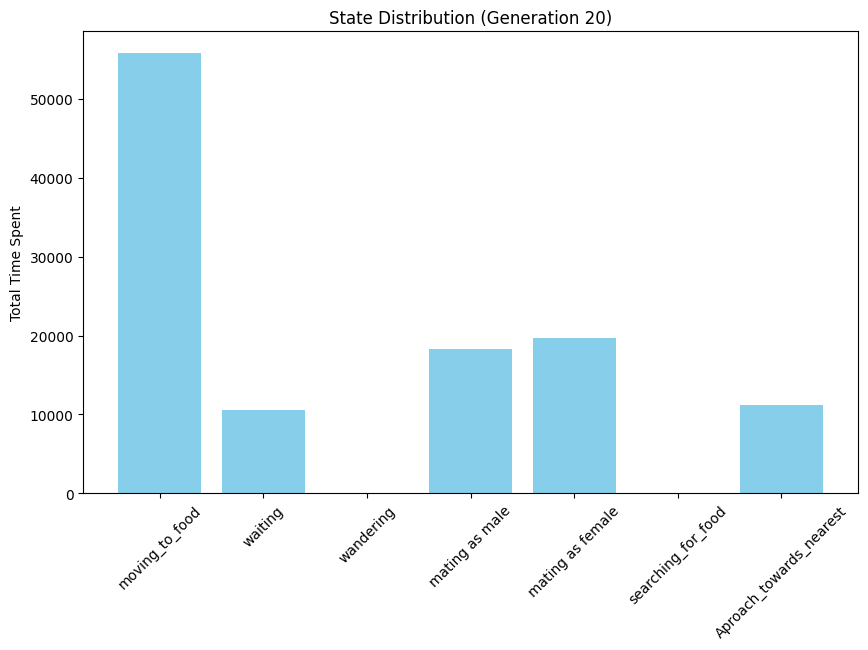

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


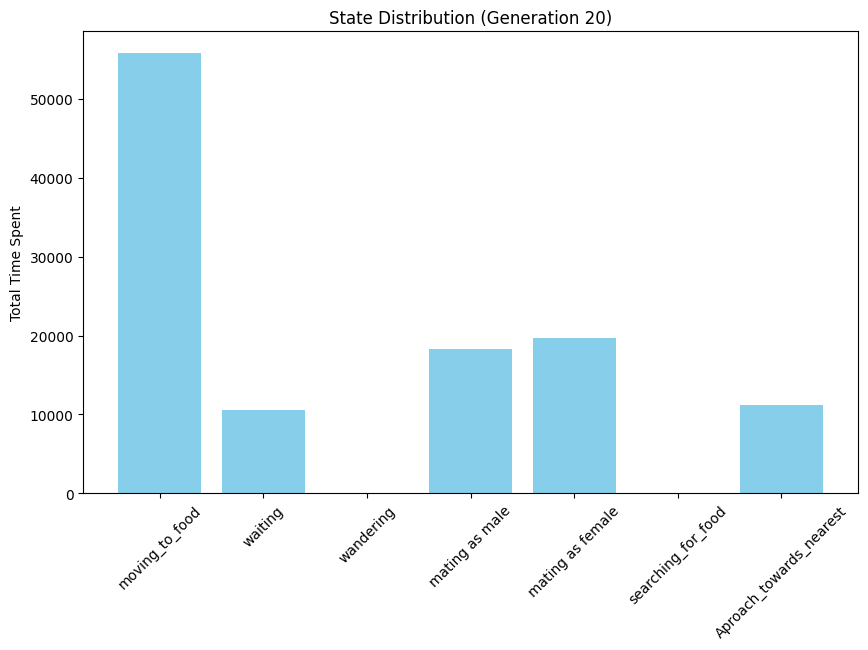

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


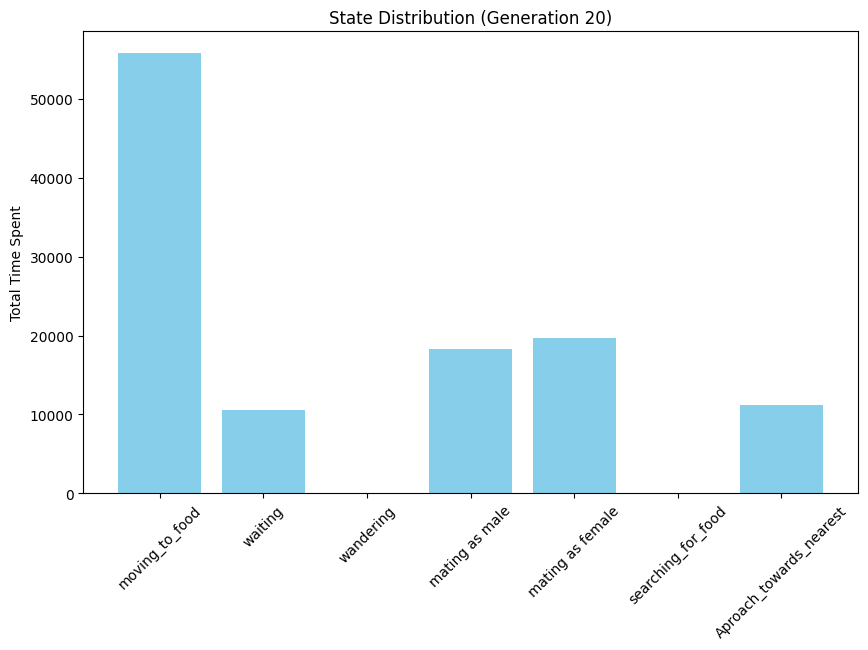

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


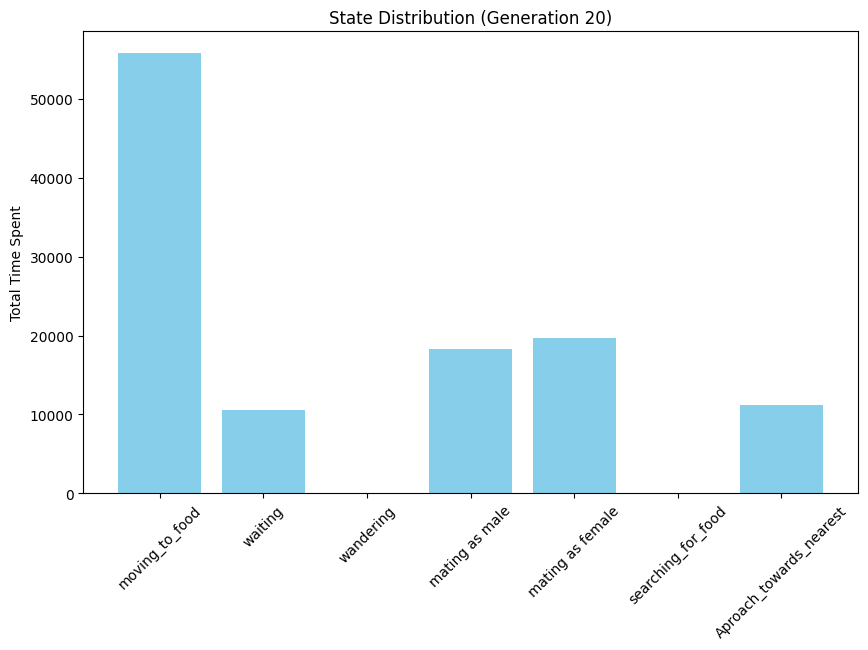

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


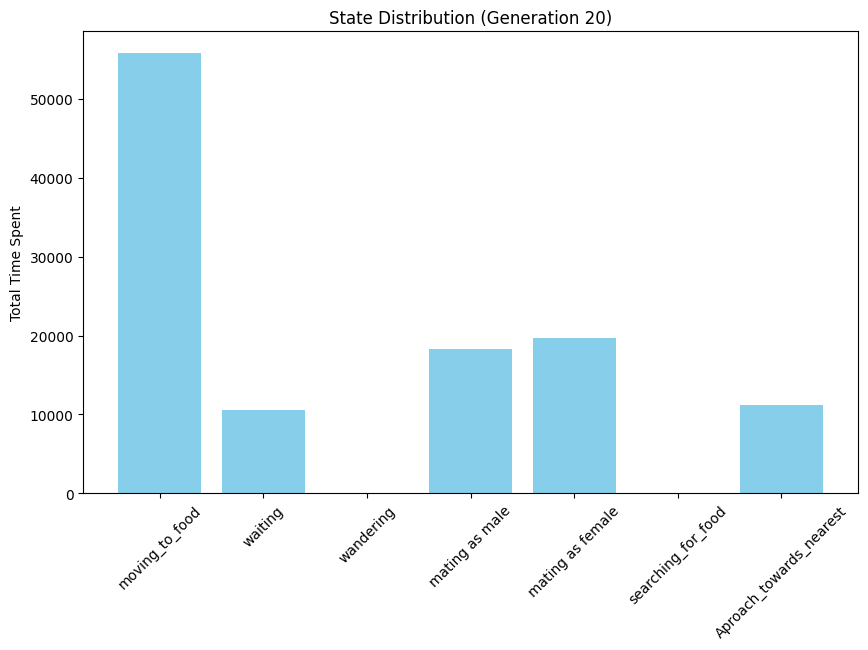

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


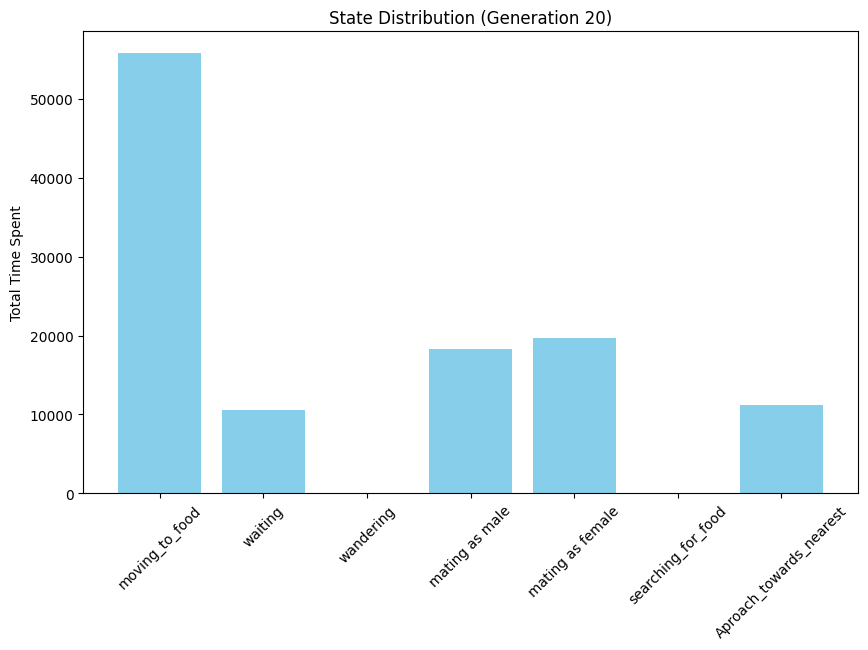

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


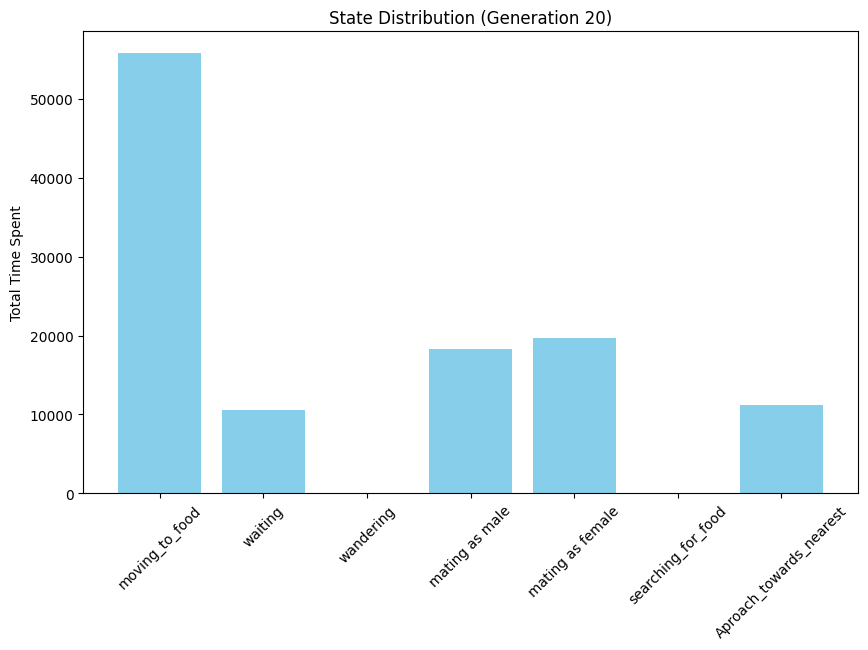

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


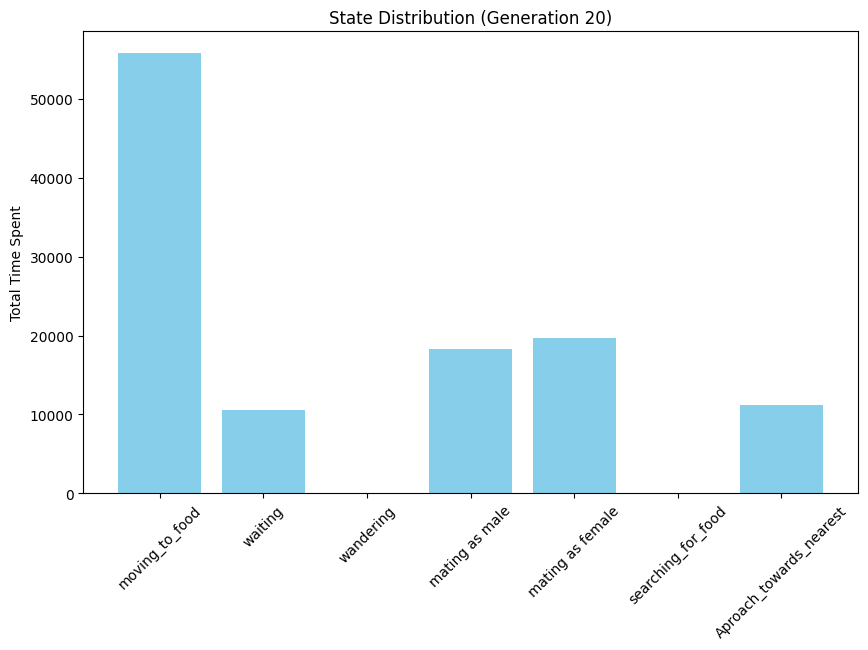

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


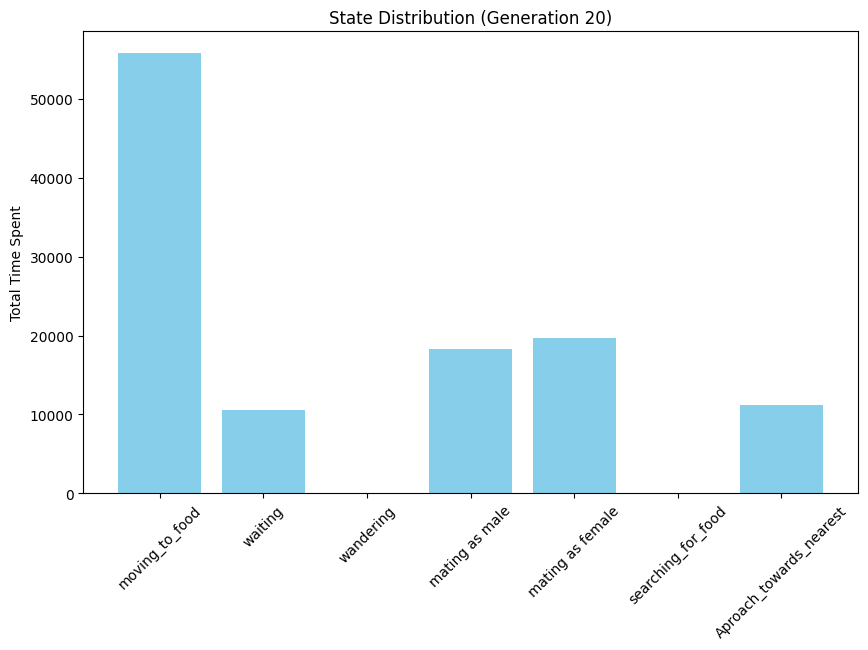

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


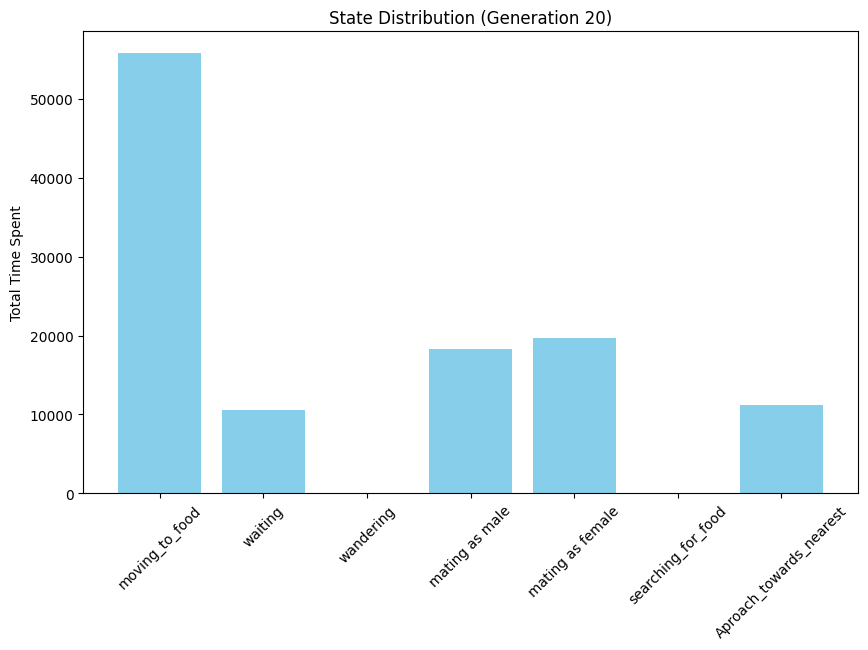

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


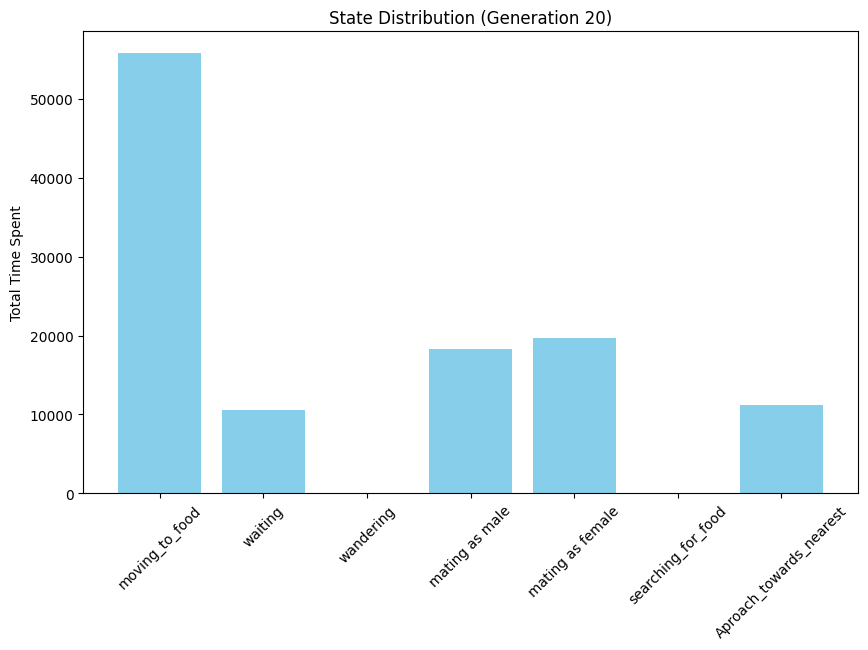

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


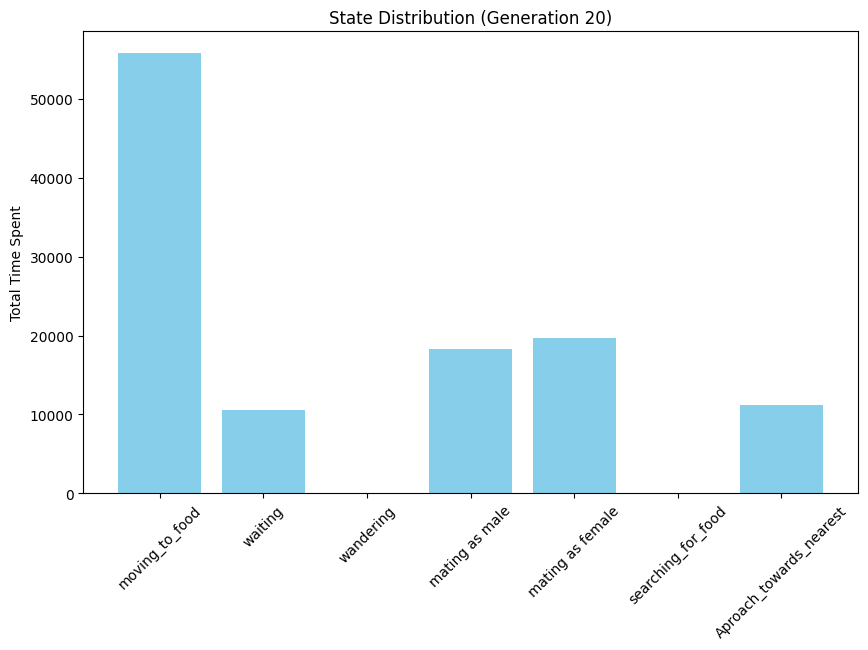

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


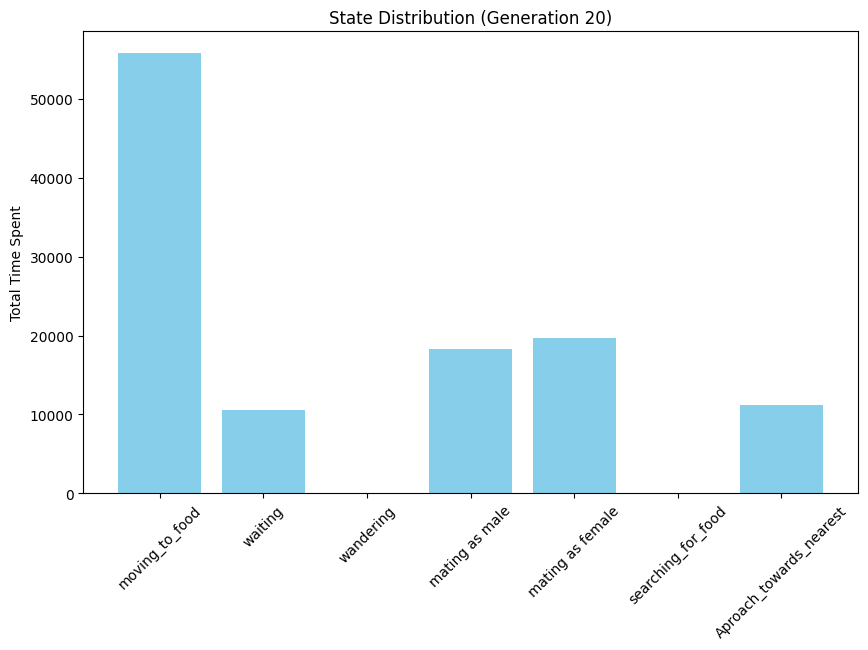

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


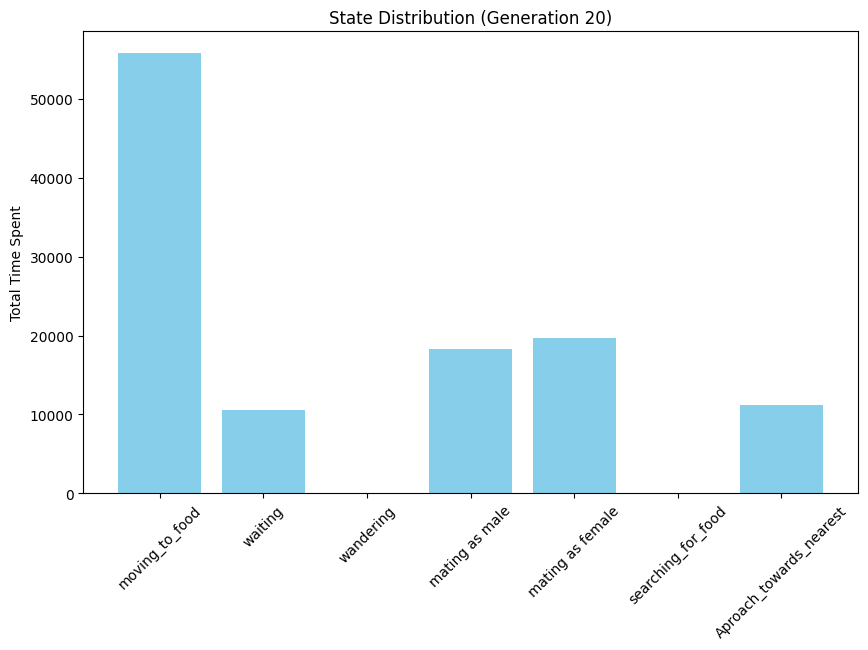

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


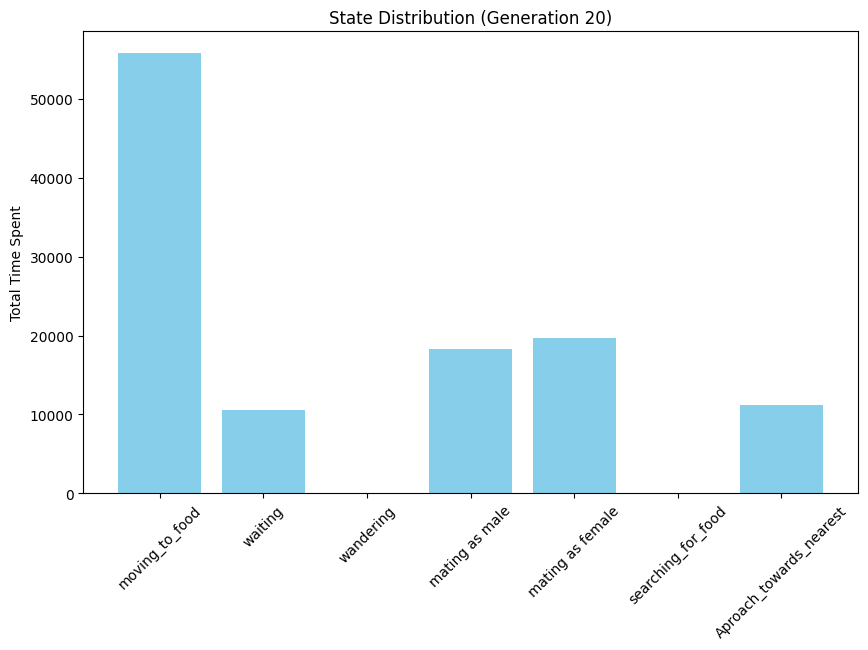

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


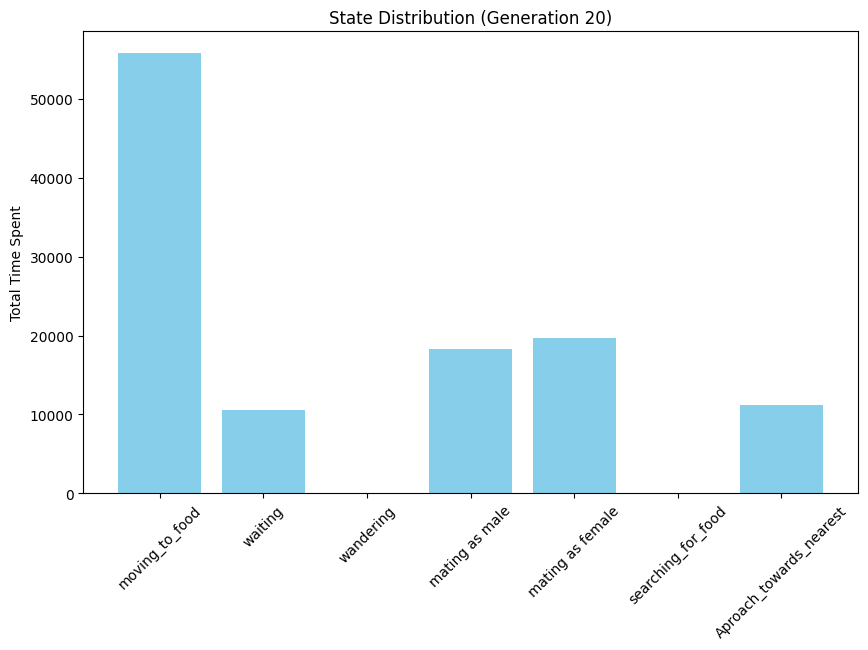

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


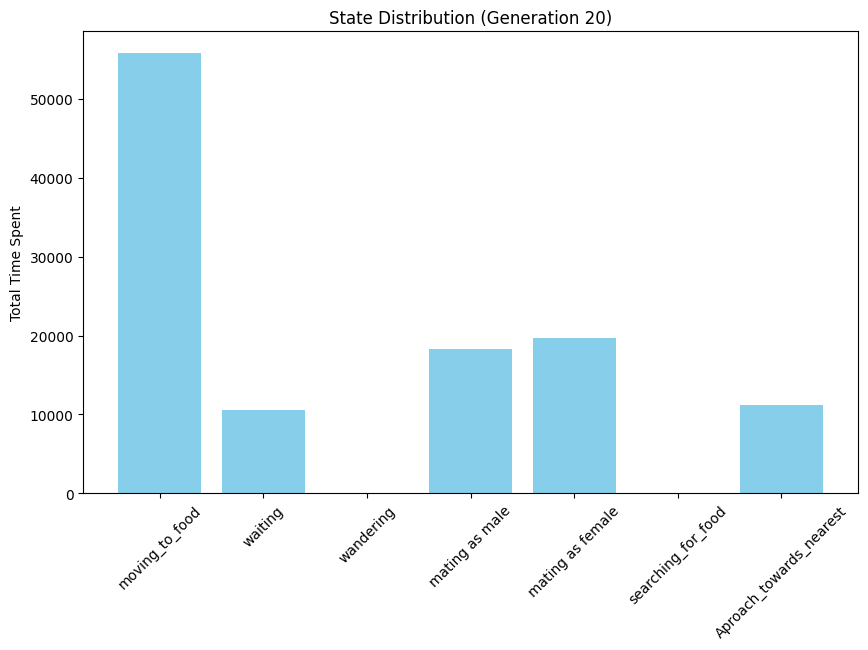

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


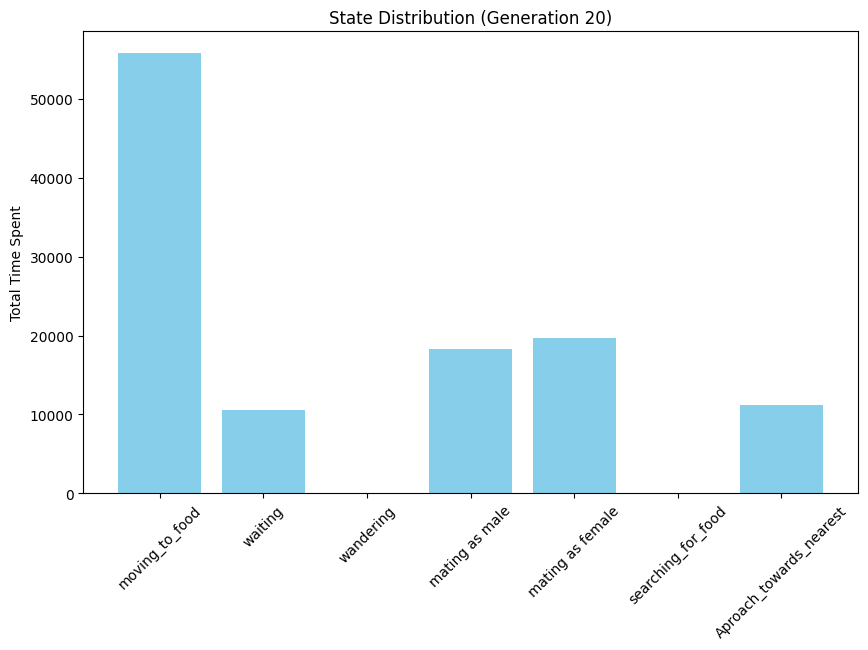

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


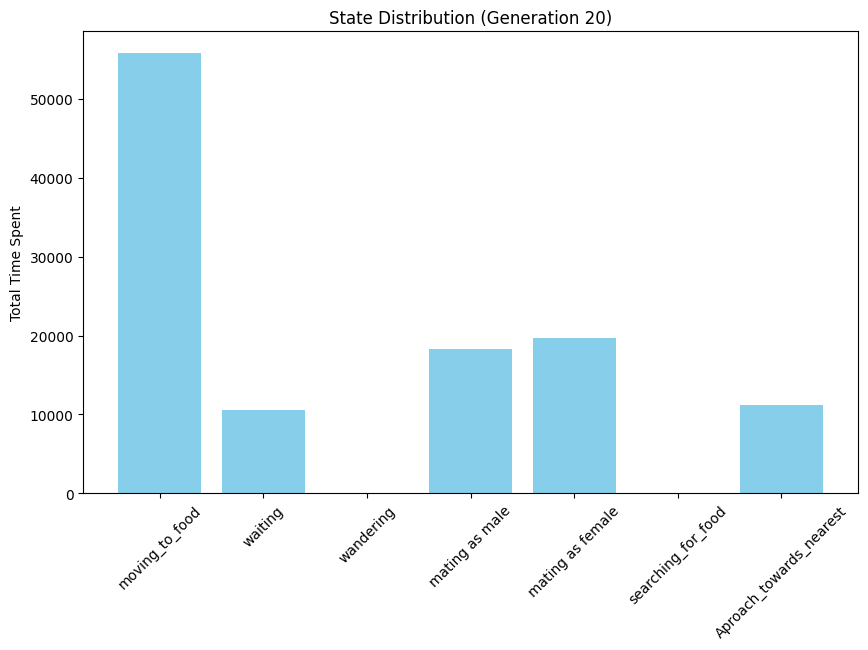

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


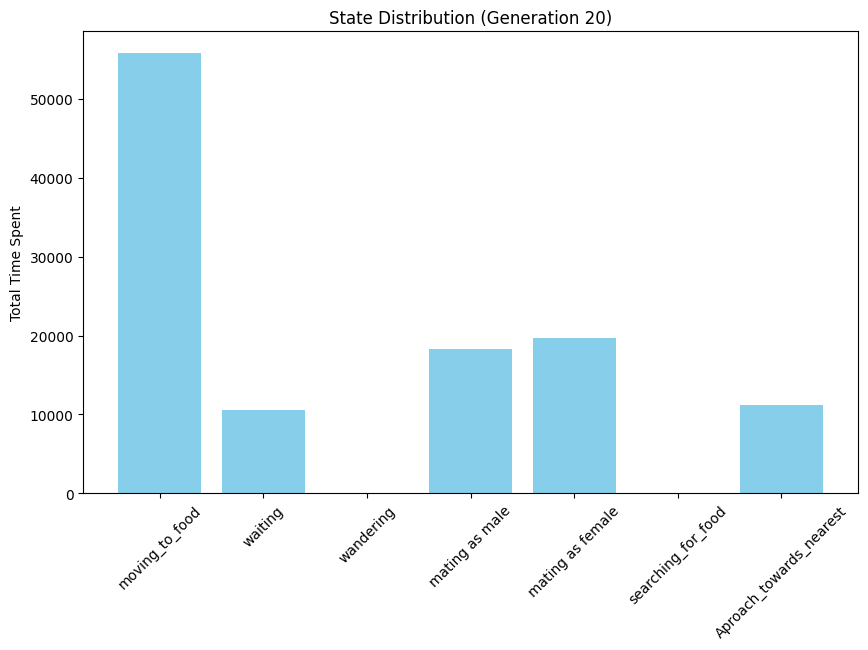

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


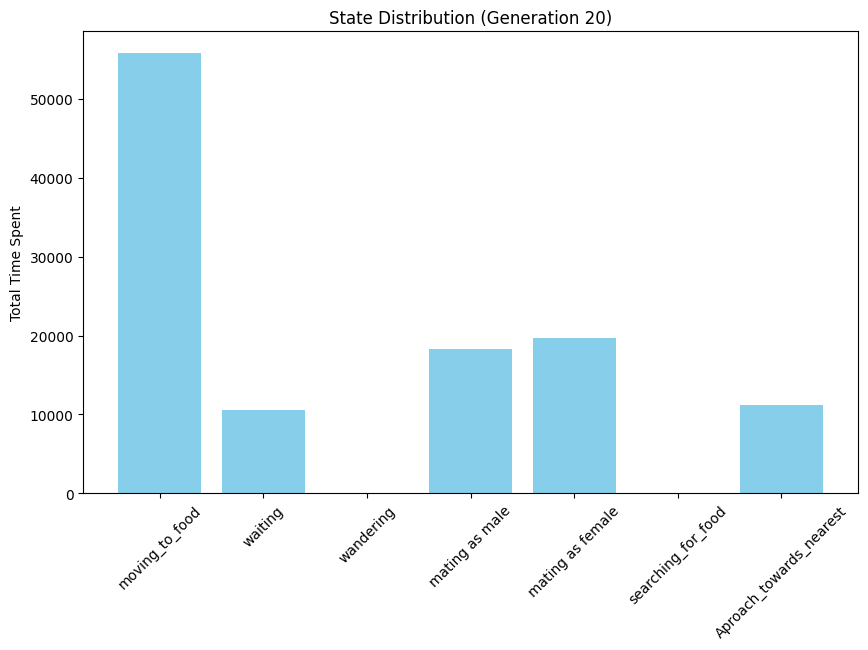

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


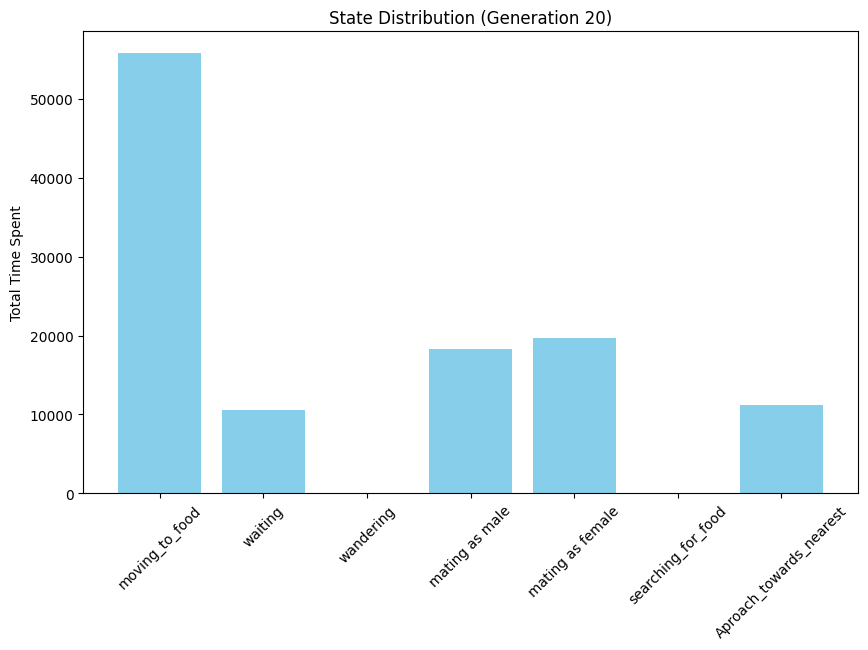

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


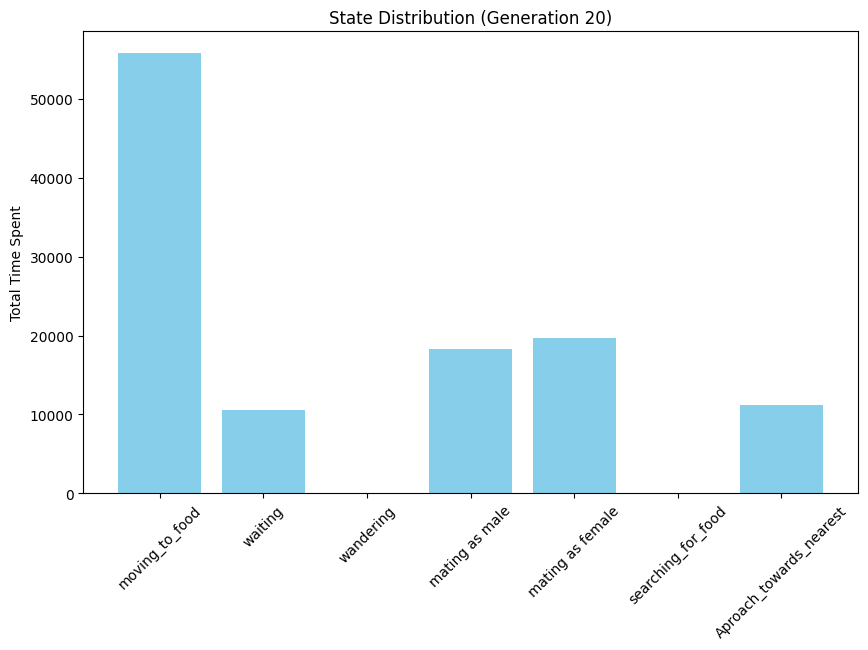

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


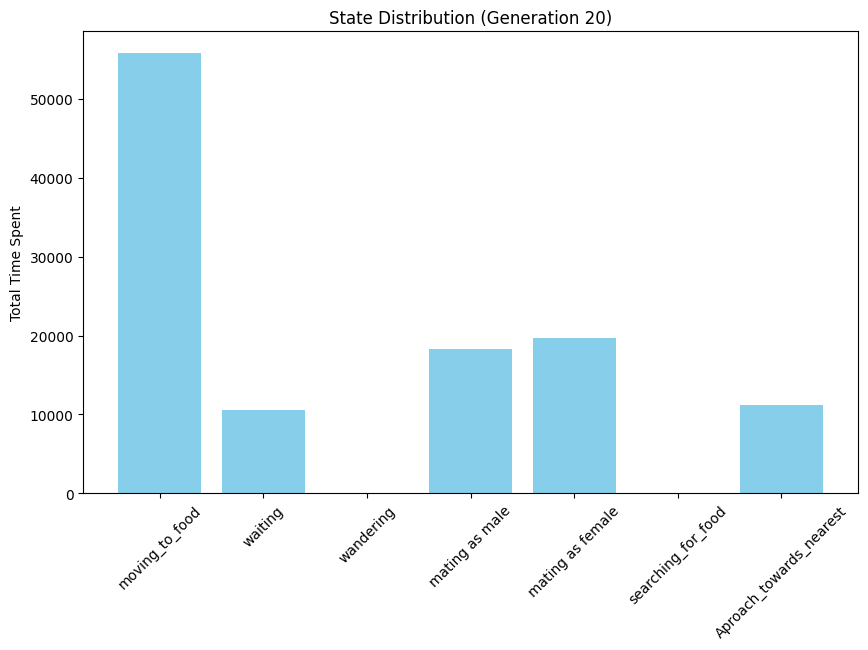

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


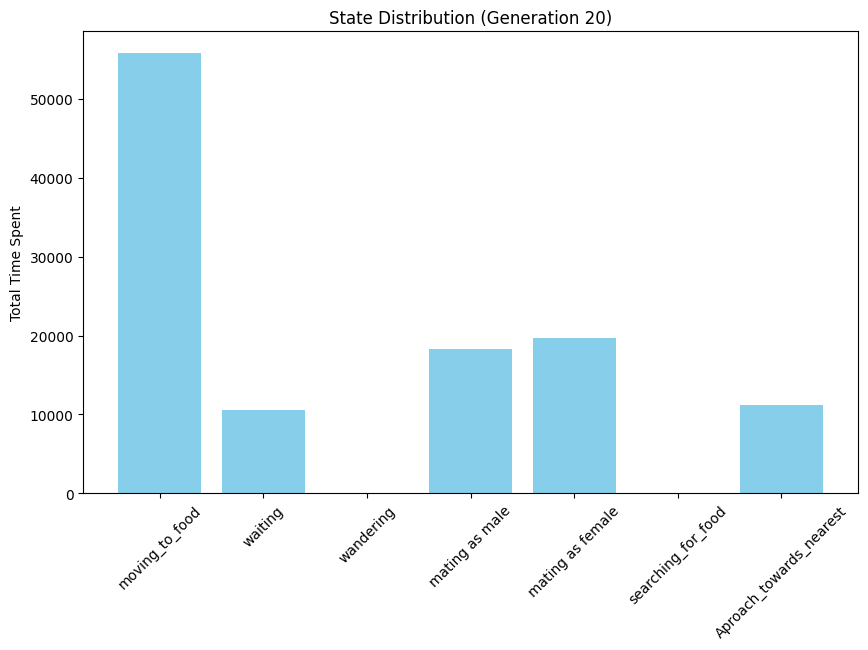

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


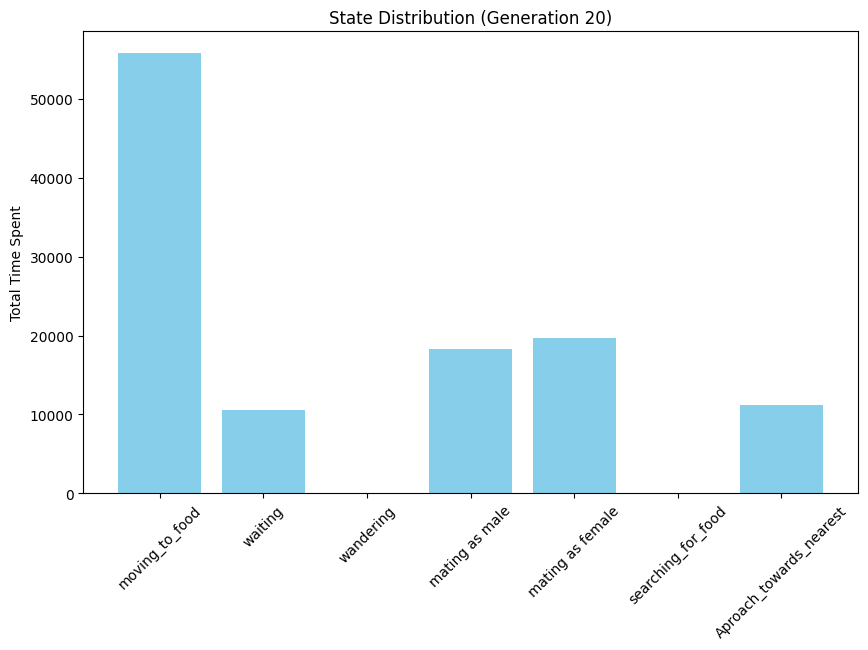

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


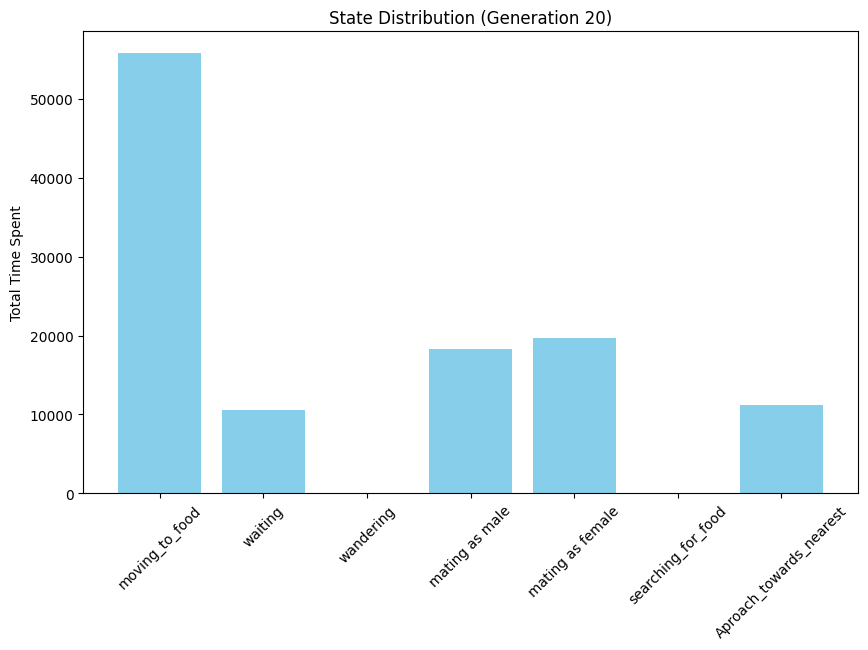

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


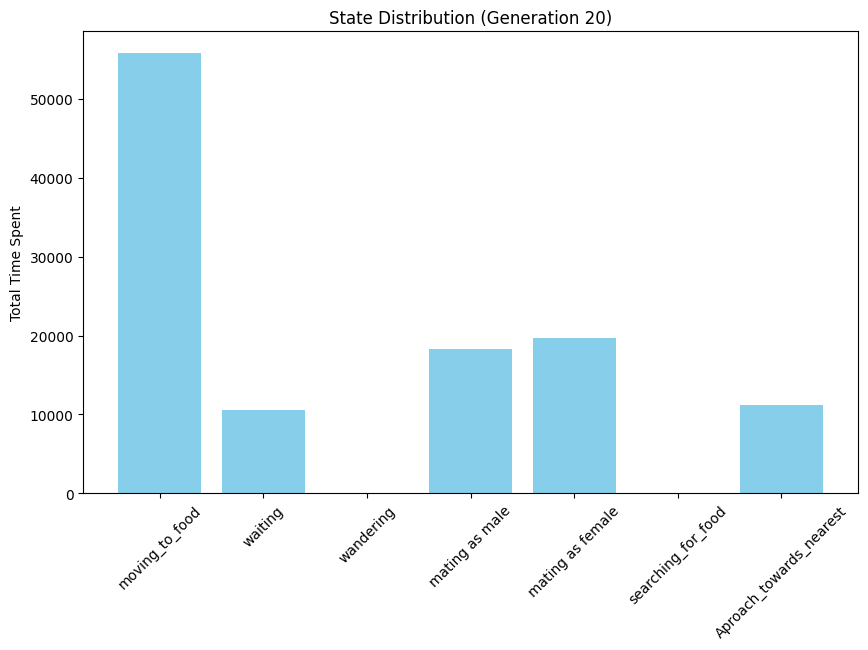

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


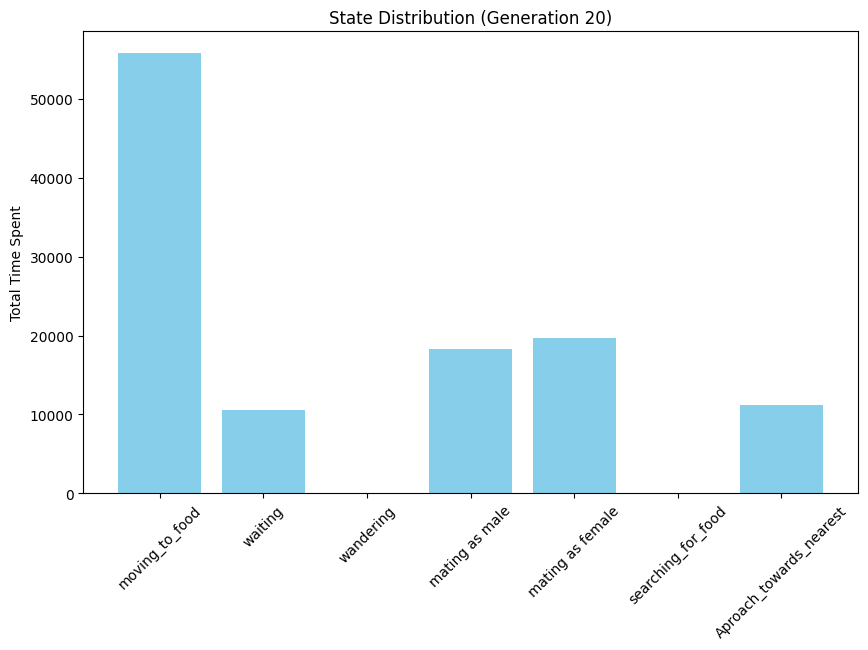

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


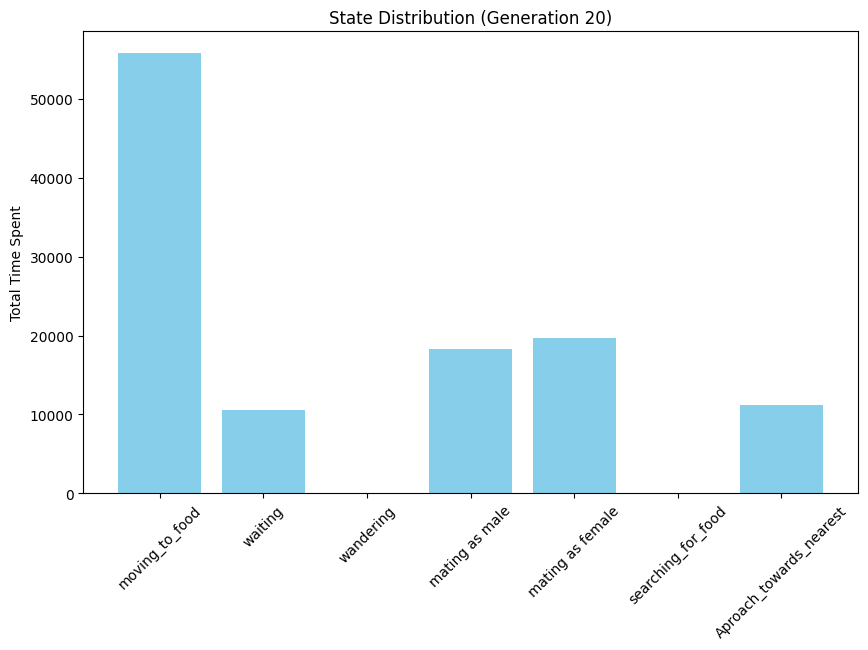

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


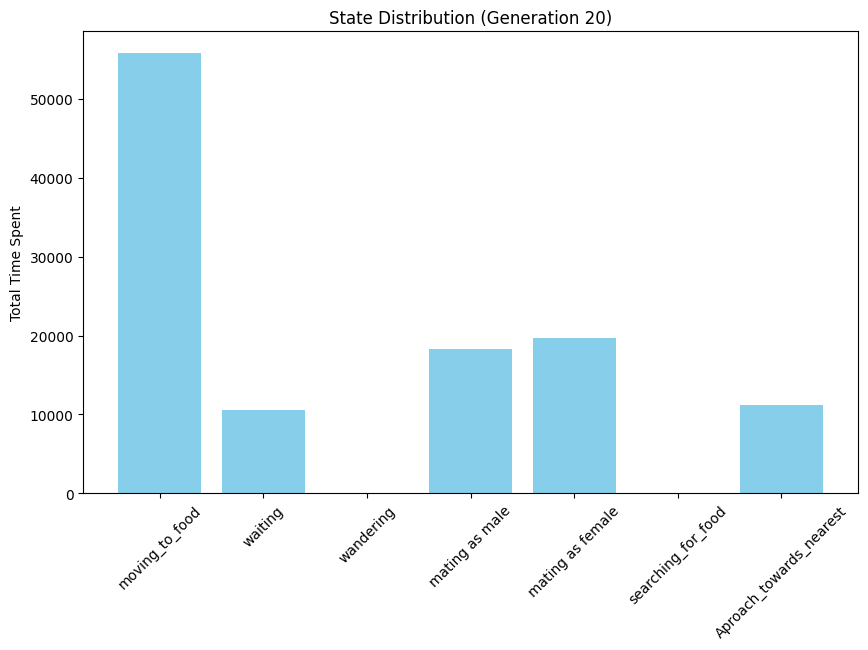

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


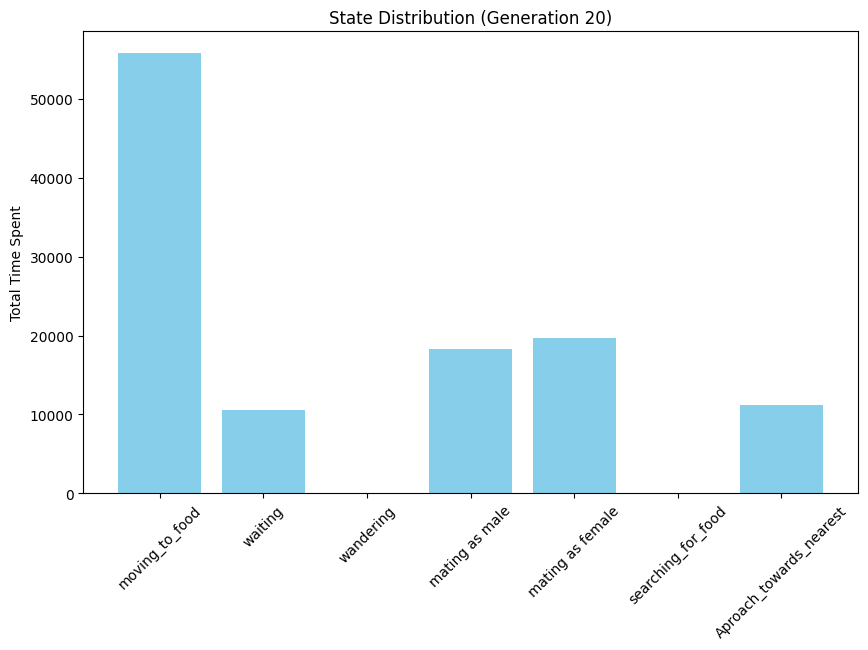

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


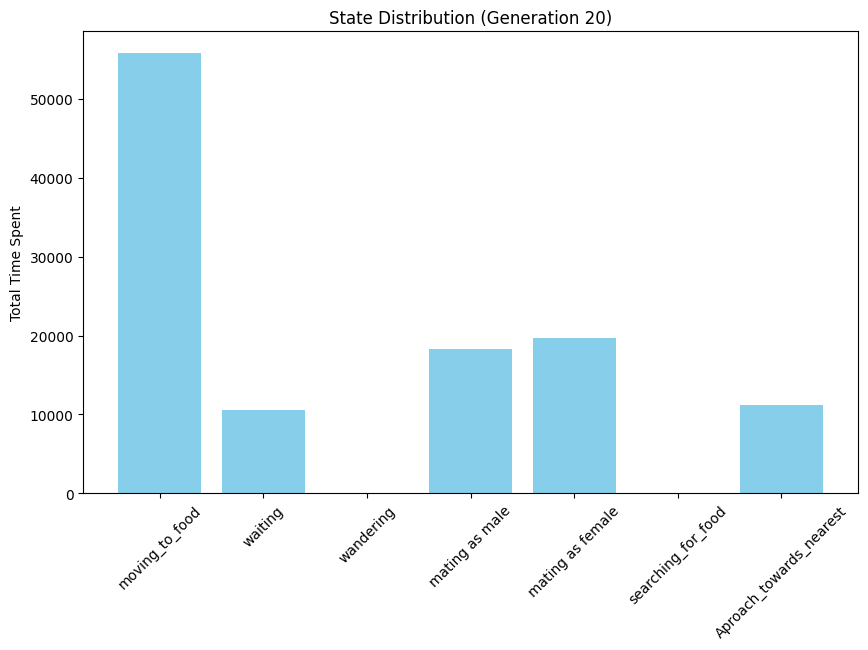

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


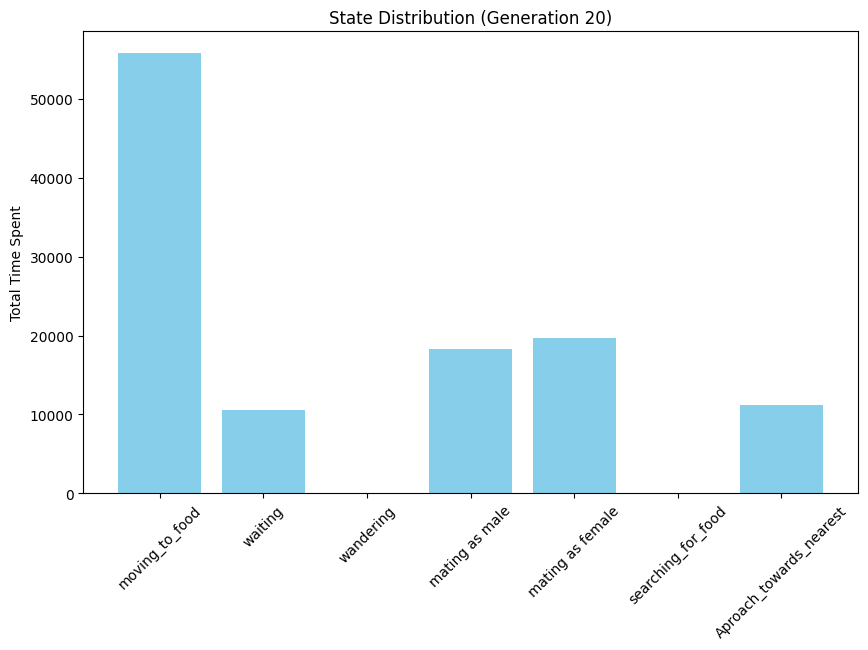

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


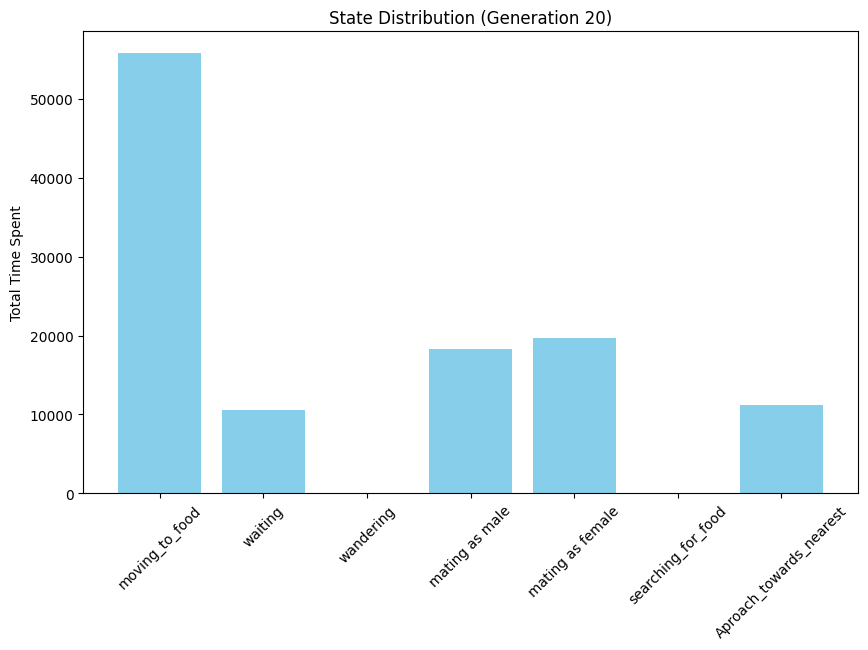

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


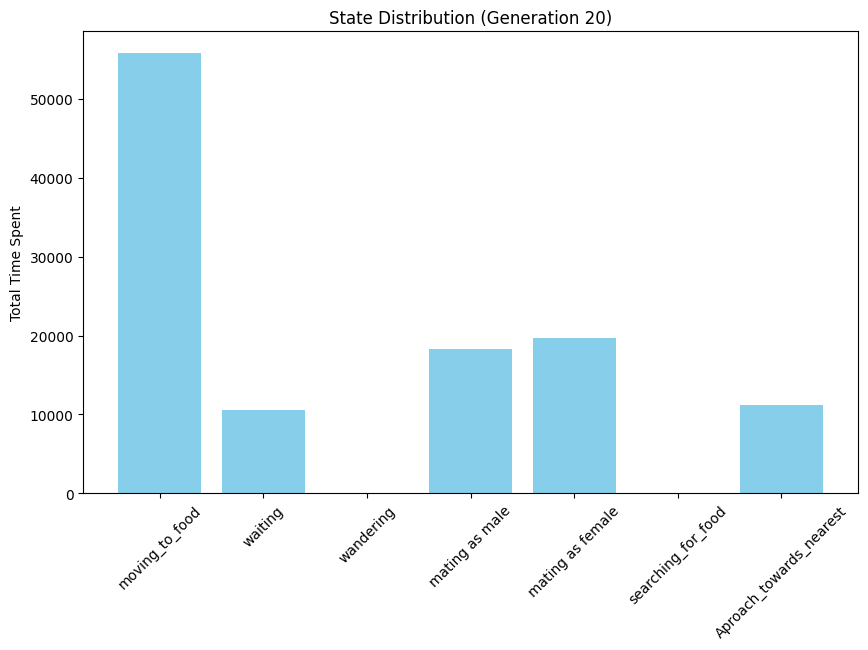

State Counts (Generation 20):
  moving_to_food: 55725
  waiting: 10542
  wandering: 0
  mating as male: 18289
  mating as female: 19623
  searching_for_food: 0
  Aproach_towards_nearest: 11166


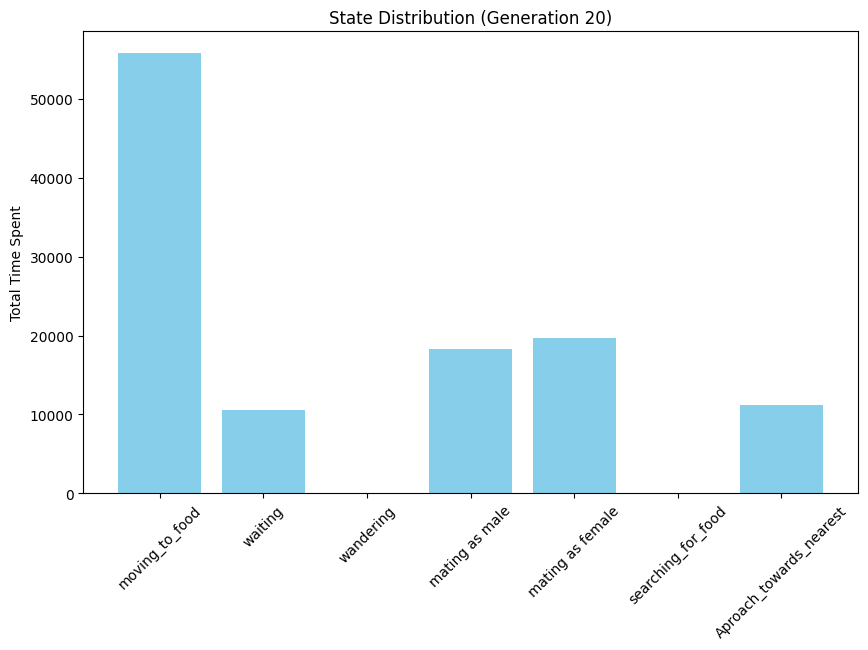

In [62]:
num=len(data)
print(num)
for i in range(num):
    analyze_agent_states(data, generation=20)


In [65]:
def identify_outliers(data, generation):
    agents = data[generation]["agents"]

    # Find outliers based on age and reproductive success
    ages = [agent["age"] for agent in agents]
    reproductive_success = [agent["reproductive_success"] for agent in agents]

    max_age = max(ages)
    max_reproductive_success = max(reproductive_success)

    # Find the corresponding agents
    oldest_agent = next(agent for agent in agents if agent["age"] == max_age)
    most_successful_agent = next(agent for agent in agents if agent["reproductive_success"] == max_reproductive_success)

    print(f"Oldest Agent (Generation {generation}): Age = {max_age}, Genome = {oldest_agent['genome']}")
    print(f"Most Successful Agent (Generation {generation}): Reproductive Success = {max_reproductive_success}, Genome = {most_successful_agent['genome']}")

# Example usage
identify_outliers(data, generation=21)


Oldest Agent (Generation 21): Age = 5250, Genome = [[-0.07120292 -0.02000105 -0.12266102 -0.01753618]
 [ 0.02207766  0.03114029 -0.06342221 -0.12347825]
 [-0.03167    -0.12503637 -0.0182418  -0.01215304]
 [ 0.11785369 -0.05068676  0.01926964 -0.00893461]
 [ 0.03072057  0.05715641 -0.06023335 -0.03223931]
 [ 0.09893624  0.16238371  0.00310769  0.06990852]]
Most Successful Agent (Generation 21): Reproductive Success = 2, Genome = [[0.         0.02721973 0.         0.04349626]
 [0.         0.15774908 0.01723222 0.09995862]
 [0.08492542 0.         0.04045664 0.00996861]
 [0.         0.06976745 0.         0.17933083]
 [0.         0.         0.02038531 0.0347393 ]
 [0.06569873 0.         0.05919044 0.24684803]]


Comparison Between Generation 1 and Generation 15:
Avg Age: Gen 1 = 1333.20, Gen 15 = 1710.07
Avg Energy: Gen 1 = 58.13, Gen 15 = 82.88
Avg Reproductive Success: Gen 1 = 0.08, Gen 15 = 0.11


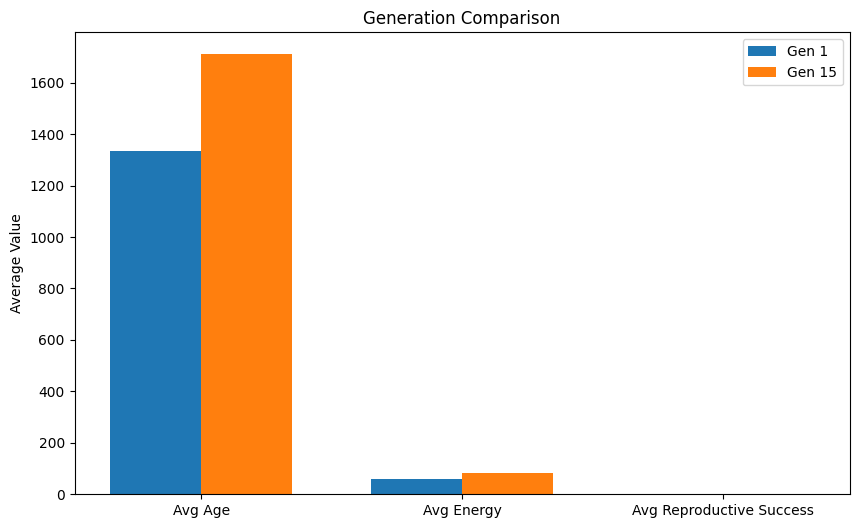

In [69]:
def compare_generations(data, gen1, gen2):
    def calculate_averages(generation):
        agents = data[generation]["agents"]
        return {
            "Avg Age": np.mean([agent["age"] for agent in agents]),
            "Avg Energy": np.mean([agent["energy_level"] for agent in agents]),
            "Avg Reproductive Success": np.mean([agent["reproductive_success"] for agent in agents])
        }

    # Calculate averages for both generations
    gen1_avg = calculate_averages(gen1)
    gen2_avg = calculate_averages(gen2)

    # Print and visualize the comparison
    print(f"Comparison Between Generation {gen1} and Generation {gen2}:")
    for metric in gen1_avg.keys():
        print(f"{metric}: Gen {gen1} = {gen1_avg[metric]:.2f}, Gen {gen2} = {gen2_avg[metric]:.2f}")

    # Bar plot for comparison
    labels = gen1_avg.keys()
    gen1_values = list(gen1_avg.values())
    gen2_values = list(gen2_avg.values())

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, gen1_values, width, label=f"Gen {gen1}")
    plt.bar(x + width/2, gen2_values, width, label=f"Gen {gen2}")
    plt.xticks(x, labels)
    plt.title("Generation Comparison")
    plt.ylabel("Average Value")
    plt.legend()
    plt.show()

# Example usage
compare_generations(data, gen1=1, gen2=15)


In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [93]:
# Flatten the genome data if nested
genomes=[]
for i in range(len(data[30]["genomes"])):
    arr = np.array(data[30]["genomes"][i])
    arr = arr.flatten()
    genomes.append(arr)

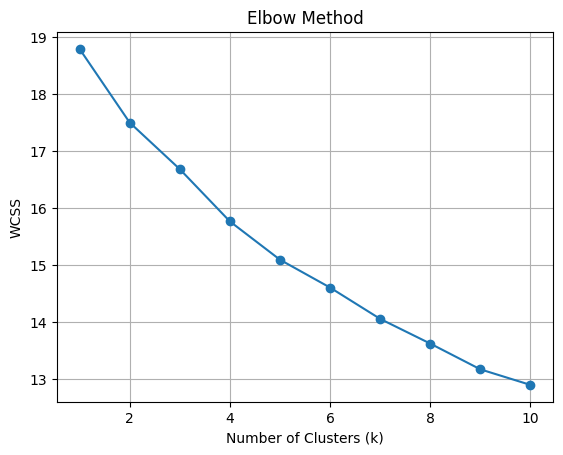

In [94]:
wcss = []

# Try clustering with 1 to 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genomes)
    wcss.append(kmeans.inertia_)  # WCSS (inertia)

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


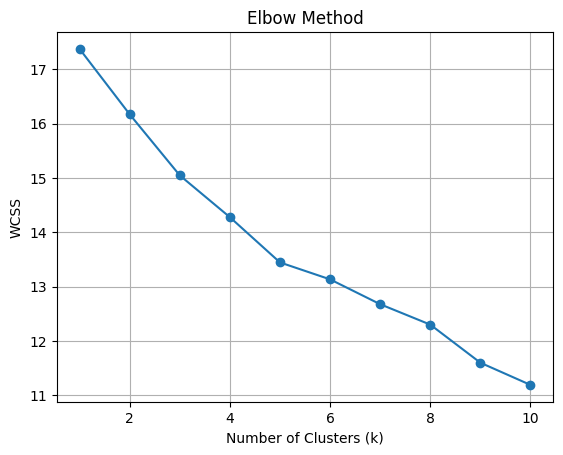

In [84]:
wcss = []

# Try clustering with 1 to 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genomes)
    wcss.append(kmeans.inertia_)  # WCSS (inertia)

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [97]:
optimal_k = 2  # Example
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(genomes)

# Cluster labels
cluster_labels = kmeans.labels_
print(cluster_labels)


[1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 1]


In [98]:
# Apply K-Means with an initial guess of 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(genomes)


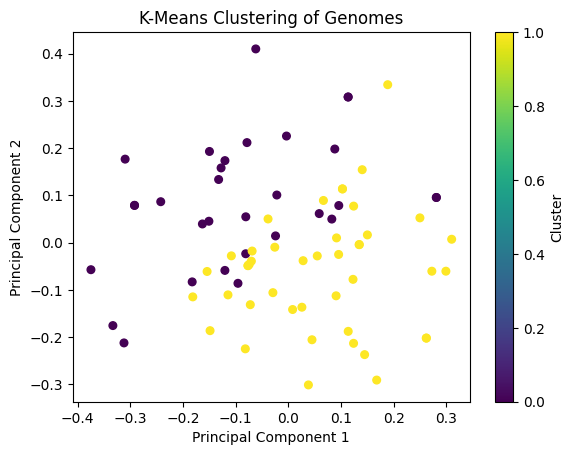

In [99]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_genomes = pca.fit_transform(genomes)

# Plot clusters
plt.scatter(reduced_genomes[:, 0], reduced_genomes[:, 1], c=clusters, cmap="viridis", s=30)
plt.title("K-Means Clustering of Genomes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()
